# fig5A

/home/fengyu/.local/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:646: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


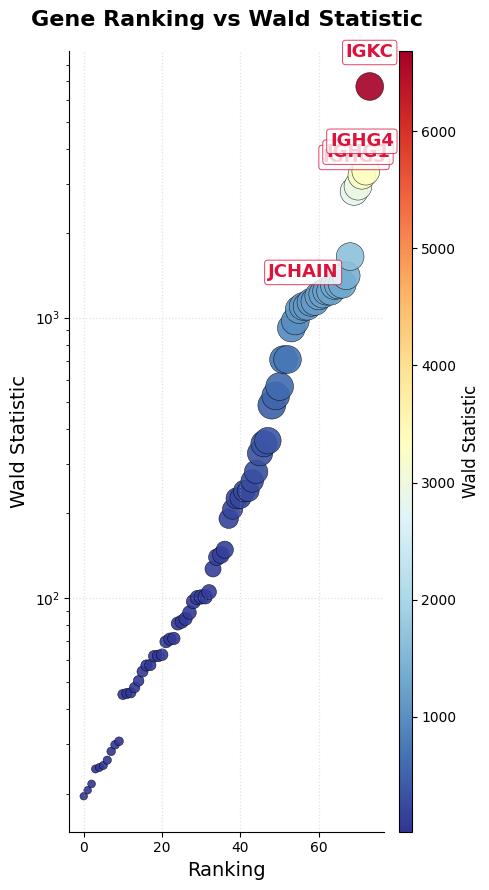

In [7]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ================================
# 1. Differential Expression (DEG)
# ================================

# Load preprocessed AnnData, restrict to relevant cell types
adata = sc.read_h5ad('/data1/fengyu/methods/zy/Review/for_github/fig4--ok/LA_cells.h5ad')
adata = adata[adata.obs['LA_anno'].isin(['PCA_IGHG/A', 'TLS_inner'])]

# DEG with t-test
sc.tl.rank_genes_groups(
    adata, groupby='LA_anno', method='t-test', use_raw=False, key_added='rank_yes_vs_no'
)

# Retrieve DEG dataframe for 'PCA_IGHG/A', filter for significance
result = sc.get.rank_genes_groups_df(adata, group='PCA_IGHG/A', key='rank_yes_vs_no')
result = result[
    (result['logfoldchanges'] > 0) &
    (result['pvals_adj'] < 0.05)
]

# =========================================
# 2. Parse tradeSeq Wald Statistic Results
# =========================================

# Load tradeSeq results and match significant genes
data = pd.read_csv('/data1/zhangyang/Method/Review/Reviewer1/point.11/top2000_for_use_tradeseq_result.csv')
data.rename(columns={'Unnamed: 0': 'GeneName'}, inplace=True)
data = data[data['GeneName'].isin(result['names'])]

# =========================================
# 3. Ranking and Scatterplot Preparation
# =========================================

new_data = data.sort_values(by='waldStat', ascending=True).reset_index(drop=True)
new_data['ranking'] = new_data.index
size_scale = 1
new_data['size'] = (new_data['waldStat'] * size_scale).clip(lower=20, upper=400)

# Select marker genes to label
sel_genes = ["IGKC", "IGHG1", "IGHG3", "IGHG4", "JCHAIN", "SSR4", "PSAP", "CD63"]

# =========================================
# 4. Publication-ready Scatter Plot
# =========================================

fig, ax = plt.subplots(figsize=(5, 9))
sc_plot = sns.scatterplot(
    data=new_data,
    x='ranking',
    y='waldStat',
    size='size',
    sizes=(30, 400),
    hue='waldStat',
    palette="RdYlBu_r",
    alpha=0.9,
    ax=ax,
    edgecolor='k',
    linewidth=0.35,
    legend=False
)

# Colorbar (WaldStat)
norm = plt.Normalize(new_data["waldStat"].min(), new_data["waldStat"].max())
sm = plt.cm.ScalarMappable(cmap="RdYlBu_r", norm=norm)
sm.set_array([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.15)
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label("Wald Statistic", fontsize=12)

# Annotate select genes
med_wald = new_data['waldStat'].median()
for _, row in new_data[new_data['GeneName'].isin(sel_genes)].iterrows():
    y_offset = 18 if row['waldStat'] > med_wald else -16
    ax.annotate(
        row['GeneName'],
        (row['ranking'], row['waldStat']),
        xytext=(0, y_offset),
        textcoords='offset points',
        fontsize=13,
        fontweight='bold',
        color='crimson',
        ha='center',
        va='bottom' if y_offset > 0 else 'top',
        bbox=dict(
            boxstyle="round,pad=0.18",
            fc="white",
            ec="crimson",
            lw=0.7,
            alpha=0.8
        )
    )

ax.set_title("Gene Ranking vs Wald Statistic", fontsize=16, weight='bold', pad=18)
ax.set_xlabel("Ranking", fontsize=14)
ax.set_ylabel("Wald Statistic", fontsize=14)
ax.set_yscale('log')
ax.grid(True, which='major', linestyle=':', linewidth=0.9, alpha=0.37)
sns.despine(ax=ax)
fig.tight_layout()
plt.savefig('Figure5A.pdf')
plt.show()

# fig5B

Step 1: 读取与筛选数据 ...
表达矩阵（前5行）:
    TSPAN6  TNMD  DPM1  SCYL3  C1orf112  FGR  CFH  FUCA2      GCLC  NFYA  ...  \
0     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   
1     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  4.275582   0.0  ...   
2     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   
3     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   
4     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   

   AC007846.2  AC134980.3  AL691520.1  AC139491.7  AC021097.2  AL590381.1  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   AC003043.2  AL356417.

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Step 3: 相关性排序与排名处理 ...
Step 4: 挑选top基因并重整数据方便绘图 ...
Step 5: 绘制各基因拟合曲线 ...


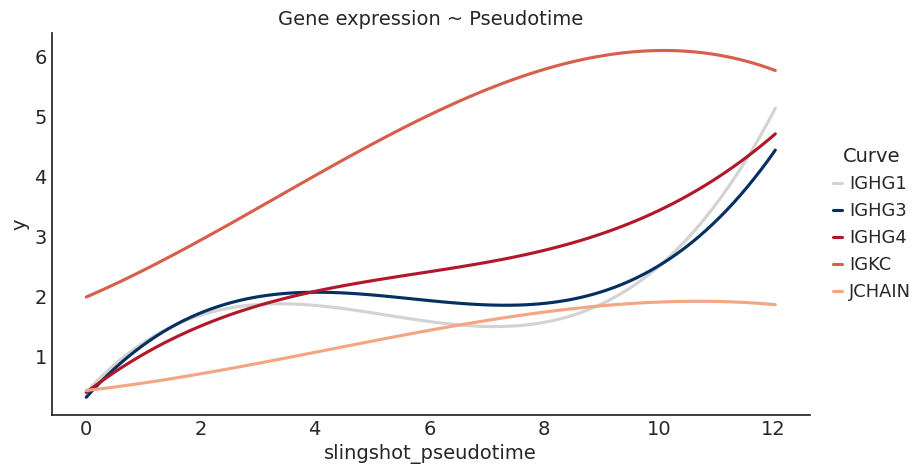

Step 6: 完成作图和导出 fig5B.pdf

All steps finished! 总计用时: 214.36 s


In [218]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import pearsonr
import time
# ========== 文件路径区 ==========
FILE_H5AD = '/data1/fengyu/methods/zy/Review/for_github/fig4--ok/LA_cells.h5ad'

def main():
    start_time = time.time()
    print("Step 1: 读取与筛选数据 ...")
    adata = sc.read_h5ad(FILE_H5AD)
    
    # 归一化+log1p
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

    ad_B = adata[
        (adata.obs['anno'].isin(['plasma_cell','b_cell'])) &
        (adata.obs['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))
    ]
    gene_expression = ad_B.to_df()
    print("表达矩阵（前5行）:\n", gene_expression.head())

    print("Step 2: 计算每基因与伪时间的Pearson相关 ...")
    correlation_results = {}
    x_pseudotime = ad_B.obs['slingshot_pseudotime']

    for gene in gene_expression.columns:
        x = gene_expression[gene]
        mask = (~pd.isnull(x)) & (~pd.isnull(x_pseudotime)) & np.isfinite(x) & np.isfinite(x_pseudotime)
        if mask.sum() < 2:
            correlation_results[gene] = np.nan
            continue
        correlation, _ = pearsonr(x[mask], x_pseudotime[mask])
        correlation_results[gene] = correlation
    correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['correlation'])

    print("Step 3: 相关性排序与排名处理 ...")
    correlation_df_sorted = correlation_df[correlation_df['correlation'].notna()].sort_values(by='correlation', ascending=False)
    correlation_df_sorted['ranking'] = range(len(correlation_df_sorted), 0, -1)
    correlation_df_sorted['ranking'] = correlation_df_sorted['ranking'] - len(correlation_df_sorted) / 2
    correlation_df_sorted['abso_correlation'] = np.abs(correlation_df_sorted['correlation'])

    print("Step 4: 挑选top基因并重整数据方便绘图 ...")
    # 你可自定义top基因
    top_genes = correlation_df_sorted.head(3000).index.astype(str).tolist()
    ad_B.var_names = ad_B.var_names.astype(str)
    df = ad_B[:, top_genes].to_df()
    df['slingshot_pseudotime'] = ad_B.obs['slingshot_pseudotime']

    focus_genes = [
        'IGKC', 'IGHG4', 'JCHAIN', 
         'IGHG1','IGHG3',
    ]
    df_long = pd.melt(
        df,
        id_vars=['slingshot_pseudotime'],
        value_vars=focus_genes,
        var_name='curve',
        value_name='y'
    )
    df_new = (
        df_long
        .groupby(['curve', 'slingshot_pseudotime'], as_index=False)  # 以 curve 和 time 为分组键
        ['y'].mean()
    )

    print("Step 5: 绘制各基因拟合曲线 ...")
    sns.set_style('white')
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'

    palette_dict = {
        'IGKC': '#d6604d',
        'IGHG4': '#b2182b',
        'JCHAIN': '#f4a582',
        'IGHG1': 'lightgrey',
        'IGHG3': '#053061',
    }

    g = sns.lmplot(
        x='slingshot_pseudotime',
        y='y',
        data=df_new,
        hue='curve',
        palette=palette_dict,
        aspect=1.5,
        ci=None,
        scatter=False,
        order=3
    )

    g._legend.set_bbox_to_anchor([1.1, 0.5])
    g._legend.set_title('Curve')
    plt.title('Gene expression ~ Pseudotime')
    plt.tight_layout()
    plt.savefig('/data1/fengyu/methods/zy/Review/for_github/fig5/fig5B.pdf', dpi=600, bbox_inches='tight')
    plt.show()


    print("Step 6: 完成作图和导出 fig5B.pdf")

    end_time = time.time()
    print('\nAll steps finished! 总计用时: {:.2f} s'.format(end_time - start_time))

if __name__ == '__main__':
    main()

# fig5C

/tmp/ipykernel_2015567/4089550691.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)


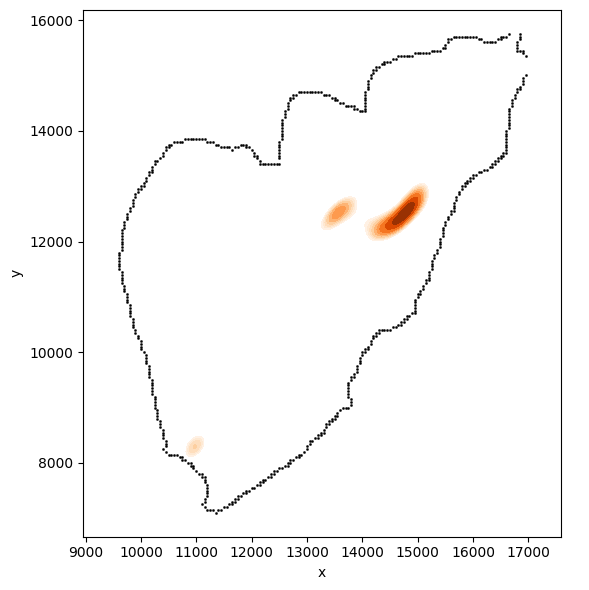

/tmp/ipykernel_2015567/4089550691.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)


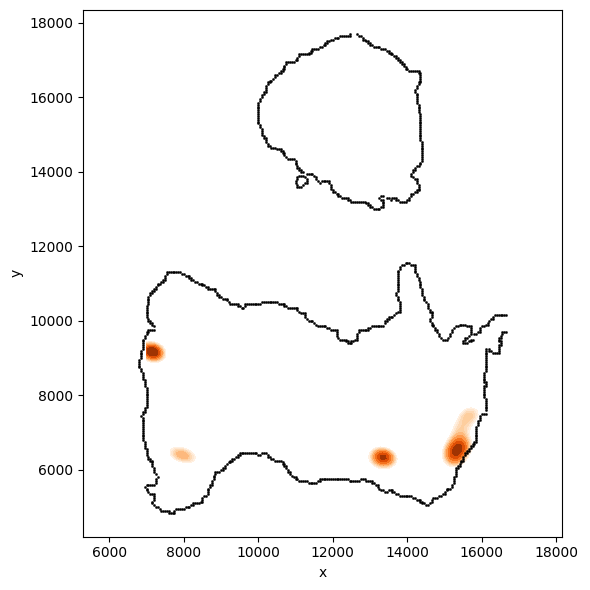

In [8]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_mutation_density_kde(adata_path, out_path):
    """
    Generate and save a spatial density plot of mutation_percent for LA-TLS/LA-PCA cells.
    
    Parameters:
        adata_path (str): Path to AnnData .h5ad file (per sample)
        out_path (str): Output file path for the resulting PNG figure
    """
    # Load AnnData
    adata = sc.read_h5ad(adata_path)
    # Tissue outline coordinates (boundary)
    tissue_outline = pd.DataFrame(adata.uns['tissue_outline'], columns=['x', 'y'])
    
    # Background white for publication
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(6, 6))

    # Subset to B cell/plasma annotation and non-negligible mutation percent
    data_sub = adata.obs[
        adata.obs['bin50 structural annotation'].isin(['LA-TLS', 'LA-PCA'])
    ]
    data_sub = data_sub[data_sub['mutation_percent'] > 0.05]

    # KDE plot of mutation density, weighted by 'mutation_percent'
    sns.kdeplot(
        data=data_sub,
        x='x', y='y',
        weights='mutation_percent',
        fill=True,
        cmap='Oranges',
        bw_adjust=0.3, cut=0.1, thresh=0.8, levels=10
    )
    # Overlay tissue boundary
    sns.scatterplot(data=tissue_outline, x='x', y='y', color='black', s=3, edgecolor=None)
    # Legend formatting
    legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    for text in legend.get_texts():
        text.set_color('black')
    plt.grid(False)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(out_path, dpi=2500)
    plt.show()

# ===== Example usage for two tissue slices =====

# Figure 5C-1
plot_mutation_density_kde(
    adata_path='/data3/zhangyang/Method_Final_analysis/D06050D4/test_analysis_celltype/D06050D4.h5ad',
    out_path='/data1/fengyu/methods/zy/Review/for_github/fig5/zhengli/Figure5C1.png'
)

# Figure 5C-2
plot_mutation_density_kde(
    adata_path='/data3/zhangyang/Method_Final_analysis/D06050C2/test_analysis_celltype/D06050C2.h5ad',
    out_path='/data1/fengyu/methods/zy/Review/for_github/fig5/zhengli/Figure5C2.png'
)

# fig5D&E

/tmp/ipykernel_2015567/2881675364.py:31: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


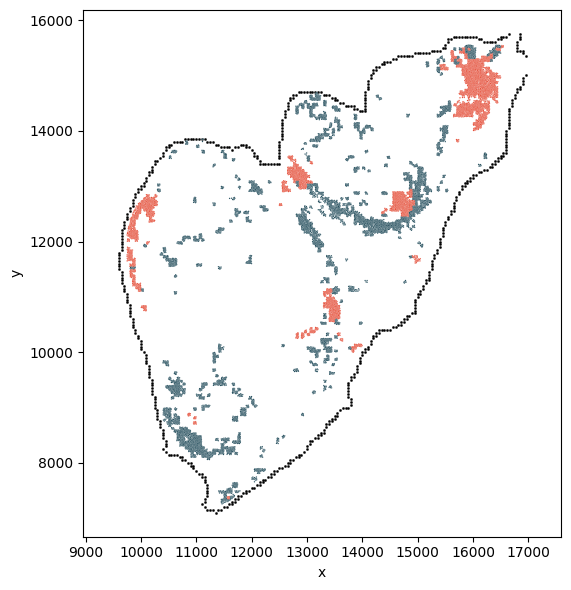

/tmp/ipykernel_2015567/2881675364.py:68: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


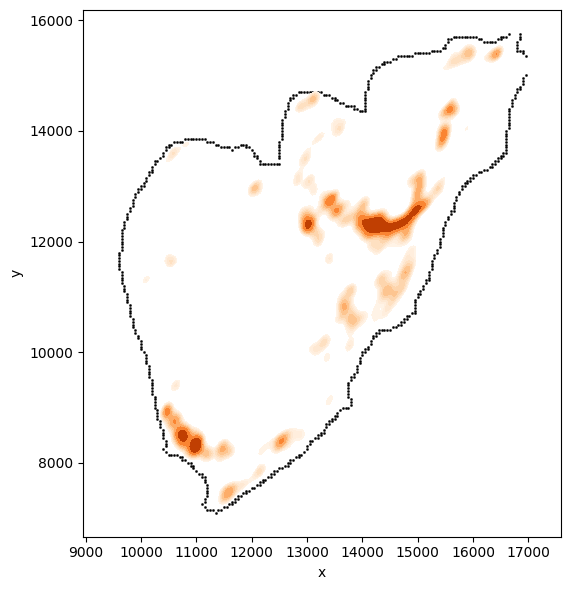

/tmp/ipykernel_2015567/2881675364.py:31: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


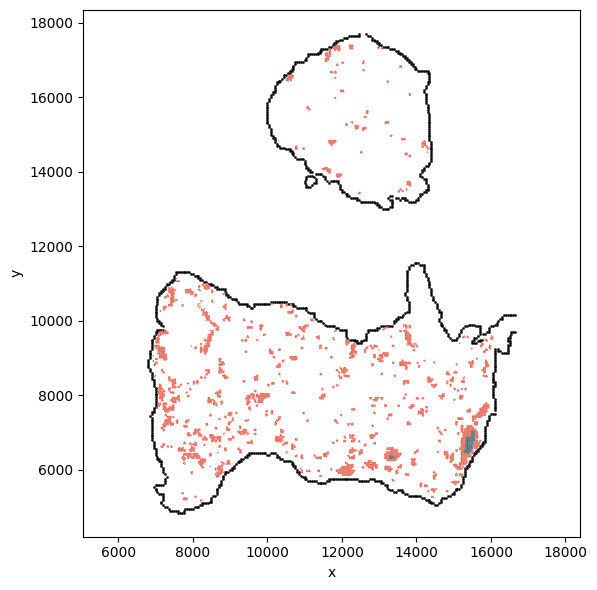

/tmp/ipykernel_2015567/2881675364.py:68: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


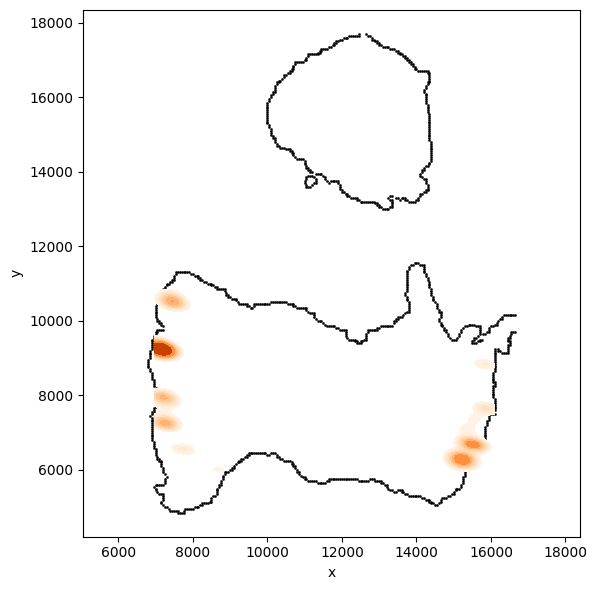

In [9]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_annotation_scatter(
    adata_path, annotation_col, annotation_groups, colors, out_path,
    tissue_outline_color='black', tissue_outline_s=3, point_size=1, fig_size=(6, 6), legend=False, dpi=2500
):
    """
    Overlay scatterplots of spatial positions colored by region annotation.

    Args:
        adata_path (str): Path to sample AnnData file.
        annotation_col (str): Column for annotation, e.g. 'bin50 structural annotation'.
        annotation_groups (list): List of annotation/group values to plot.
        colors (list): Colors corresponding to annotation_groups.
        out_path (str): Output path for figure.
        tissue_outline_color (str): Color for tissue boundary.
        tissue_outline_s (int): Size for tissue boundary points.
        point_size (int): Point size for cells.
        fig_size (tuple): Figure size.
        legend (bool): Show legend.
        dpi (int): Output resolution.
    """
    adata = sc.read_h5ad(adata_path)
    df = adata.obs
    tissue_outline = pd.DataFrame(adata.uns['tissue_outline'], columns=['x', 'y'])
    plt.figure(figsize=fig_size)
    sns.scatterplot(data=tissue_outline, x='x', y='y', color=tissue_outline_color, s=tissue_outline_s, edgecolor=None)
    sns.scatterplot(
        data=df[df[annotation_col].isin(annotation_groups)],
        x='x', y='y', palette=colors, hue=annotation_col, legend=legend, s=point_size
    )
    plt.grid(False)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(out_path, dpi=dpi, bbox_inches='tight')
    plt.show()

def plot_csr_kde(
    adata_path, csr_col, out_path,
    tissue_outline_color='black', tissue_outline_s=3, fig_size=(6, 6),
    kde_palette='Oranges', kde_bw=0.2, kde_thresh=0.5, kde_cut=0.2, kde_kernel='linear', dpi=2500
):
    """
    Overlay spatial CSR KDE plot above tissue outline.

    Args:
        adata_path (str): Path to sample AnnData file.
        csr_col (str): Column in .obs denoting CSR state ('yes', 'no', etc.).
        out_path (str): Output path for figure.
        tissue_outline_color (str): Color for tissue outline points.
        tissue_outline_s (int): Size of outline points.
        fig_size (tuple): Figure size.
        kde_palette (str): Color map for KDE.
        kde_bw (float): Bandwidth (bw_adjust) for KDE.
        kde_thresh (float): KDE density threshold.
        kde_cut (float): KDE cut for plot extent.
        kde_kernel (str): KDE kernel type.
        dpi (int): Output resolution.
    """
    adata = sc.read_h5ad(adata_path)
    df = adata.obs
    tissue_outline = pd.DataFrame(adata.uns['tissue_outline'], columns=['x', 'y'])
    plt.figure(figsize=fig_size)
    sns.scatterplot(data=tissue_outline, x='x', y='y', color=tissue_outline_color, s=tissue_outline_s, edgecolor=None)
    sns.kdeplot(
        data=df[(df[csr_col] == 'yes')],
        x='x', y='y',
        fill=True,
        cmap=kde_palette,
        bw_adjust=kde_bw,
        thresh=kde_thresh,
        kernel=kde_kernel,
        cut=kde_cut
    )
    plt.grid(False)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(out_path, dpi=dpi, bbox_inches='tight')
    plt.show()


### Example usage for two samples (zoomin and overview) ###

# Figure 5E-1: Region annotation scatterplot (zoom-in)
plot_annotation_scatter(
    adata_path='/data3/zhangyang/Method_Final_analysis/D06050D4/test_analysis_celltype/D06050D4.h5ad',
    annotation_col='bin50 structural annotation',
    annotation_groups=['LA-TLS', 'LA-PCA'],
    colors=['#E64B35', '#204B5A'],
    out_path='./fig5E1_zoomin.png',
    legend=False,
    dpi=2500
)

# Figure 5D-1: CSR KDE plot (zoom-in)
plot_csr_kde(
    adata_path='/data3/zhangyang/Method_Final_analysis/D06050D4/test_analysis_celltype/D06050D4.h5ad',
    csr_col='CSR',
    out_path='/data1/fengyu/methods/zy/Review/for_github/fig5/fig5D1_zoomin.png',
    kde_palette='Oranges',
    kde_bw=0.2,
    kde_thresh=0.5,
    kde_kernel='linear',
    kde_cut=0.2,
    dpi=2500
)

# Figure 5E-2: Region annotation scatterplot (overview)
plot_annotation_scatter(
    adata_path='/data3/zhangyang/Method_Final_analysis/D06050C2/test_analysis_celltype/D06050C2.h5ad',
    annotation_col='bin50 structural annotation',
    annotation_groups=['LA-TLS', 'LA-PCA'],
    colors=['#E64B35', '#204B5A'],
    out_path='./fig5E2_overview.png',
    legend=False,
    dpi=600
)

# Figure 5D-2: CSR KDE plot (overview)
plot_csr_kde(
    adata_path='/data3/zhangyang/Method_Final_analysis/D06050C2/test_analysis_celltype/D06050C2.h5ad',
    csr_col='CSR',
    out_path='/data1/fengyu/methods/zy/Review/for_github/fig5/zhengli/fig5D2_overview.png',
    kde_palette='Oranges',
    kde_bw=0.2,
    kde_thresh=0.5,
    kde_kernel='linear',
    kde_cut=0.2,
    dpi=600
)

# fig5F

In [56]:

import scanpy as sc
import pandas as pd

# Load main AnnData with all samples/cells
adata = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/all_sample_data/all_sample_celltype.h5ad')

# Create a working dataframe
df = adata.obs.copy()

# Create hypermutation flag based on somatic mutation threshold (percent > 0.05 → 'yes')
df['hypermuation'] = 'no'
df.loc[df['mutation_percent'] > 0.05, 'hypermuation'] = 'yes'

# Prepare collection for batch-level result rows
records = []

for region in ['LA-PCA', 'LA-TLS']:
    sub_region = df[df['bin50 structural annotation'] == region]
    for b in sub_region['batch'].unique():
        sub = sub_region[sub_region['batch'] == b]
        rate = sub['hypermuation'].eq('yes').sum() / sub.shape[0] if sub.shape[0] > 0 else 0
        records.append({'batch': b, 'region': region, 'hypermutation_rate': rate})

# Assemble result table
result_df = pd.DataFrame(records)

# Optional: sort table for plotting
result_df = result_df.sort_values(['region', 'batch']).reset_index(drop=True)

# Save as CSV for plotting/publication
result_df.to_csv('./fig5F.csv', index=False)

print(result_df)

       batch  region  hypermutation_rate
0   D06047A2  LA-PCA            0.267322
1   D06047C3  LA-PCA            0.074818
2   D06047D4  LA-PCA            0.092910
3   D06047E1  LA-PCA            0.127298
4   D06047E2  LA-PCA            0.183660
5   D06047F6  LA-PCA            0.101596
6   D06050A2  LA-PCA            0.049510
7   D06050C2  LA-PCA            0.128530
8   D06050D4  LA-PCA            0.034977
9   D06050E4  LA-PCA            0.394896
10  D06053D2  LA-PCA            0.459903
11  D06047A2  LA-TLS            0.080250
12  D06047C3  LA-TLS            0.025708
13  D06047D4  LA-TLS            0.075295
14  D06047E1  LA-TLS            0.061936
15  D06047E2  LA-TLS            0.023988
16  D06047F6  LA-TLS            0.016650
17  D06050A2  LA-TLS            0.019957
18  D06050C2  LA-TLS            0.127953
19  D06050D4  LA-TLS            0.015986
20  D06053D2  LA-TLS            0.100164


# fig5G

In [10]:
import scanpy as sc
import pandas as pd

# List of AnnData file paths and corresponding batch names
file_paths = [
    '/data3/zhangyang/Method_Final_analysis/D06047A2/test_analysis_celltype/D06047A2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047C3/test_analysis_celltype/D06047C3.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047D4/test_analysis_celltype/D06047D4.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047E1/test_analysis_celltype/D06047E1.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047E2/test_analysis_celltype/D06047E2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047F6/test_analysis_celltype/D06047F6.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050A2/test_analysis_celltype/D06050A2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050C2/test_analysis_celltype/D06050C2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050D4/test_analysis_celltype/D06050D4.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050E4/test_analysis_celltype/D06050E4.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06053D2/test_analysis_celltype/D06053D2.h5ad'
]
batch_categories = [
    "D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2",
    "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"
]

# Prepare results DataFrame
results = []

# Iterate through each sample file and calculate CSR cell percentages in PCA and TLS regions
for path, batch in zip(file_paths, batch_categories):
    data = sc.read_h5ad(path)
    data.var_names_make_unique()
    # Compute in PCAcluster
    if 'PCAcluster' in data.obs.columns:
        PCA = data.obs[data.obs['PCAcluster'].notna()]
        PCA_cell_number = len(PCA)
        CSR_PCA = PCA[PCA['CSR'] == 'yes']
        CSR_cell_percent_PCA = CSR_PCA.shape[0] / PCA_cell_number if PCA_cell_number > 0 else 0
    else:
        print(f"Warning: 'PCAcluster' column not found in batch {batch}. Skipping PCA calculations.")
        CSR_cell_percent_PCA = None
    # Compute in TLScluster
    if 'TLScluster' in data.obs.columns:
        TLS = data.obs[data.obs['TLScluster'].notna()]
        TLS_cell_number = len(TLS)
        CSR_TLS = TLS[TLS['CSR'] == 'yes']
        CSR_cell_percent_TLS = CSR_TLS.shape[0] / TLS_cell_number if TLS_cell_number > 0 else 0
    else:
        print(f"Warning: 'TLScluster' column not found in batch {batch}. Skipping TLS calculations.")
        CSR_cell_percent_TLS = None
    results.append({
        'batch': batch,
        'CSR_cell_percent_PCA': CSR_cell_percent_PCA,
        'CSR_cell_percent_TLS': CSR_cell_percent_TLS
    })

# Convert to DataFrame and save
results_df = pd.DataFrame(results)
results_df.to_csv('./Figure5G_CSR_cell_percentages.csv', index=False)

print("Results saved as: Figure5G_CSR_cell_percentages.csv")

Results saved as: Figure5G_CSR_cell_percentages.csv


# fig5H

D06047A2 loaded.
D06047C3 loaded.
D06047D4 loaded.
D06047E1 loaded.
D06047E2 loaded.
D06047F6 loaded.
D06050A2 loaded.
D06050C2 loaded.
D06050D4 loaded.
D06050E4 loaded.
D06053D2 loaded.


/home/fengyu/.local/lib/python3.13/site-packages/anndata/_core/merge.py:1410: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/fengyu/.local/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


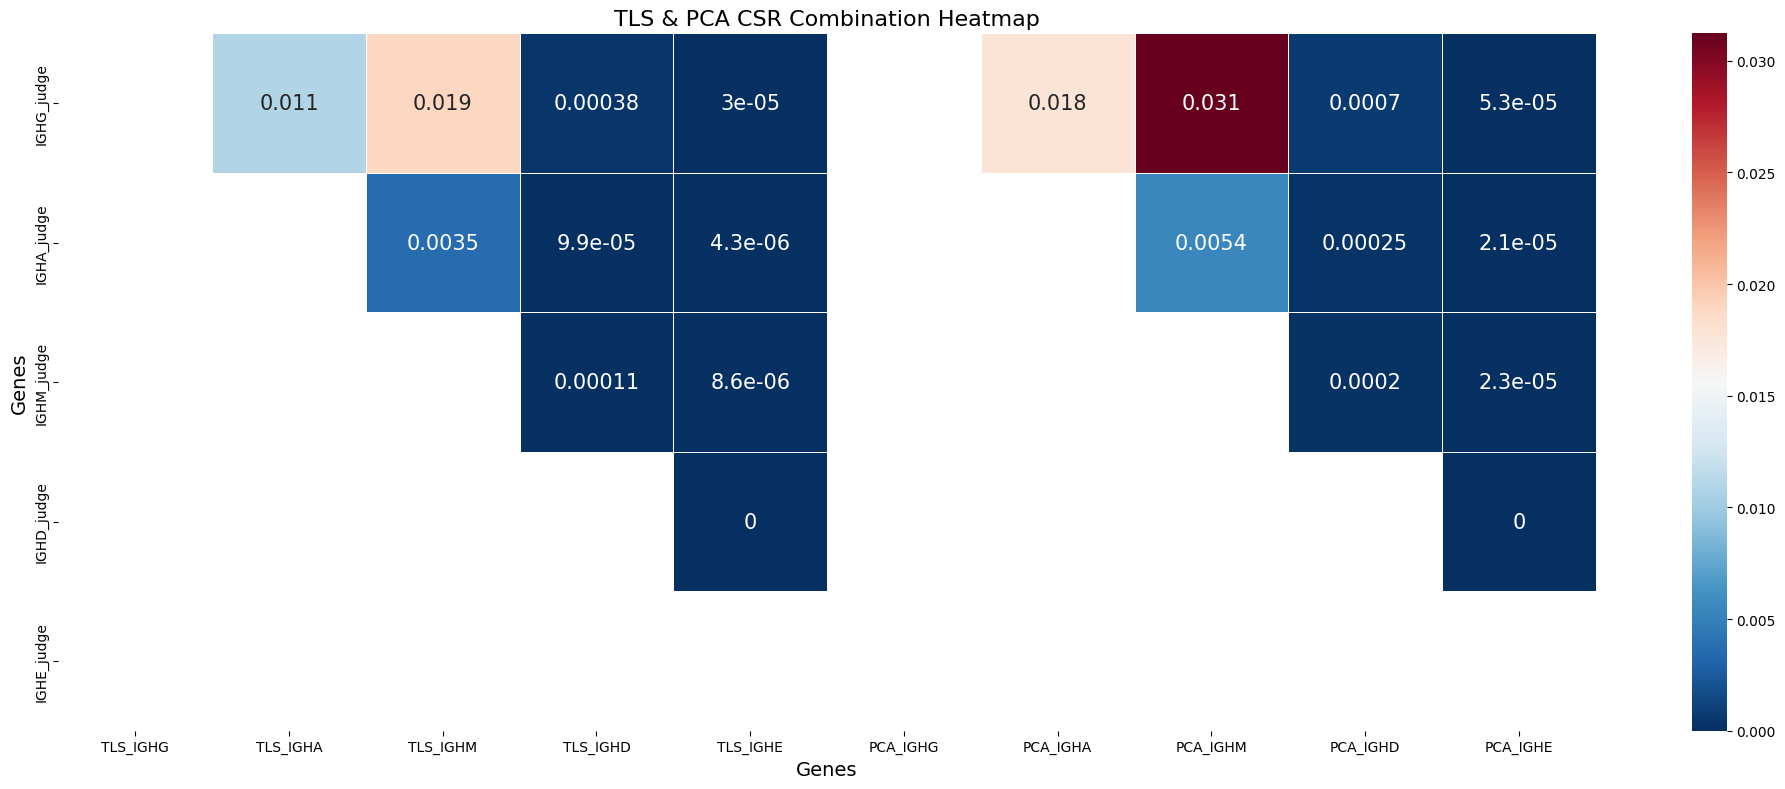

In [11]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Customizable paths and batch list
base_path = '/data1/fengyu/methods/zy/Review/for_github/Review/Reviewer3--ok/point5/50%'
batch_categories = [
    "D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2",
    "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"
]
columns_to_check = ['IGHG_judge', 'IGHA_judge','IGHM_judge', 'IGHD_judge', 'IGHE_judge']

# Load each sample and concatenate
adata_list = []
for batch in batch_categories:
    h5ad_path = os.path.join(base_path, f"{batch}.h5ad")
    adata = sc.read_h5ad(h5ad_path)
    adata_list.append(adata)
    print(f"{batch} loaded.")

adata = sc.concat(adata_list, join='outer', label='batch', keys=batch_categories)
df = adata.obs[['IGHM_judge', 'IGHD_judge', 'IGHE_judge', 'IGHG_judge', 'IGHA_judge', 'CSR', 'classes', 'bin50 structural annotation']].copy()

# --------- For LA-PCA region ---------
df_pca = df[df.index.isin(adata[adata.obs['bin50 structural annotation'].isin(['LA-PCA'])].obs.index)]
csr_yes_df_pca = df_pca[df_pca['CSR'] == 'yes']
csr_matrix_pca = pd.DataFrame(0, index=columns_to_check, columns=columns_to_check)

for _, row in csr_yes_df_pca.iterrows():
    yes_genes = row[columns_to_check][row[columns_to_check] == 'yes'].index
    for gene1 in yes_genes:
        for gene2 in yes_genes:
            csr_matrix_pca.loc[gene1, gene2] += 1

mask = np.tril(np.ones_like(csr_matrix_pca, dtype=bool))
csr_matrix_masked_pca = csr_matrix_pca.where(~mask)
# Normalize by total region cell count
csr_matrix_masked_pca = csr_matrix_masked_pca / len(df_pca)

# --------- For LA-TLS region ---------
df_tls = df[df.index.isin(adata[adata.obs['bin50 structural annotation'].isin(['LA-TLS'])].obs.index)]
csr_yes_df_tls = df_tls[df_tls['CSR'] == 'yes']
csr_matrix_tls = pd.DataFrame(0, index=columns_to_check, columns=columns_to_check)
for _, row in csr_yes_df_tls.iterrows():
    yes_genes = row[columns_to_check][row[columns_to_check] == 'yes'].index
    for gene1 in yes_genes:
        for gene2 in yes_genes:
            csr_matrix_tls.loc[gene1, gene2] += 1

mask_tls = np.tril(np.ones_like(csr_matrix_tls, dtype=bool))
csr_matrix_masked_tls = csr_matrix_tls.where(~mask_tls)
csr_matrix_masked_tls = csr_matrix_masked_tls / len(df_tls)

# --------- Rename for figure assembly ---------
csr_matrix_masked_pca.columns = ['PCA_IGHG','PCA_IGHA','PCA_IGHM','PCA_IGHD','PCA_IGHE']
csr_matrix_masked_tls.columns = ['TLS_IGHG','TLS_IGHA','TLS_IGHM','TLS_IGHD','TLS_IGHE']

# Combine two (side by side)
result = pd.concat([csr_matrix_masked_tls, csr_matrix_masked_pca], axis=1)

# --------- Plot combined heatmap ---------
plt.figure(figsize=(20, 8))
sns.heatmap(
    result,
    annot=True,
    fmt=".2g",
    cmap="RdBu_r",
    linewidths=.5,
    annot_kws={"fontsize": 15}
)
plt.title('TLS & PCA CSR Combination Heatmap', fontsize=16)
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Genes', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.savefig('./fig5H.pdf', dpi=600, bbox_inches='tight')
plt.show()

# fig5I

In [12]:
adata = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/all_sample_data/all_sample_celltype.h5ad')

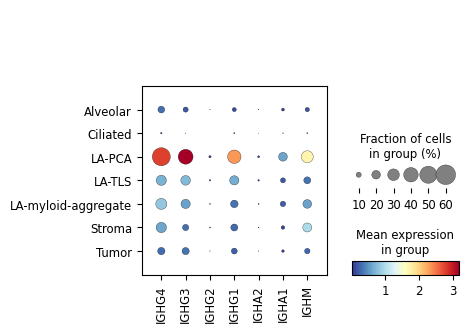

In [13]:
sc.pl.dotplot(adata,var_names=['IGHG4','IGHG3','IGHG2','IGHG1','IGHA2','IGHA1','IGHM']
              ,groupby='bin50 structural annotation',cmap='RdYlBu_r',
              use_raw=False,save='fig5I.pdf')

# fig5J

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


Figure5J1.pdf and Figure5J2.pdf have been saved successfully.


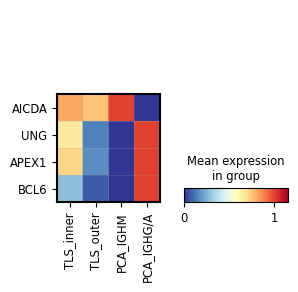

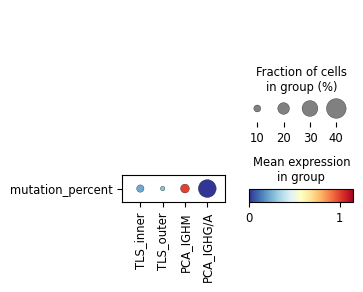

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 1. Load AnnData and Annotation
# ===============================

# Load main AnnData object with all samples and celltypes
adata = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/all_sample_data/all_sample_celltype.h5ad')

# Load additional annotation containing LA_anno assignment per location
meta = pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv', index_col=0)

# Create a unique location identifier
adata.obs['loc'] = (
    adata.obs['batch'].astype(str)
    + '_'
    + adata.obs['bin50_x'].astype(str)
    + '_'
    + adata.obs['bin50_y'].astype(str)
)

# Merge LA_anno annotation into adata.obs
adata.obs = adata.obs.merge(meta[['loc', 'LA_anno']], on='loc', how='left')

# =================================
# 2. Set Plotting Style (White bg)
# =================================
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Annotation group order for plots
order = ['TLS_inner', 'TLS_outer', 'PCA_IGHM', 'PCA_IGHG/A']

# ======================================
# 3. Generate and Save MatrixPlot (Fig J1)
# ======================================
# Matrixplot for mutagenesis genes (scaled per gene/var)
dp1 = sc.pl.matrixplot(
    adata,
    var_names=['AICDA', 'UNG', 'APEX1', 'BCL6'],
    groupby='LA_anno',
    standard_scale='var',
    cmap='RdYlBu_r',
    swap_axes=True,
    vmax=1.15,
    categories_order=order,
    show=False,
    return_fig=True
)
dp1.savefig('Figure5J1.pdf', bbox_inches='tight')

# ======================================
# 4. Generate and Save DotPlot (Fig J2)
# ======================================
# Dotplot for mutation_percent
dp2 = sc.pl.dotplot(
    adata,
    var_names=['mutation_percent'],
    groupby='LA_anno',
    standard_scale='var',
    cmap='RdYlBu_r',
    swap_axes=True,
    vmax=1.15,
    categories_order=order,
    return_fig=True
)
dp2.savefig('Figure5J2.pdf', bbox_inches='tight')

print("Figure5J1.pdf and Figure5J2.pdf have been saved successfully.")

# fig5K

In [2]:
import scanpy as sc
import pandas as pd

# ===== 1. Data Preparation =====

# Load the annotated full-sample AnnData object
adata = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/all_sample_data/all_sample_celltype.h5ad')

# Load the meta file containing LA_anno for each location (bin)
meta = pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv', index_col=0)

# Assign unique location identifier and merge LA_anno into obs
adata.obs['loc'] = (
    adata.obs['batch'].astype(str) + '_' +
    adata.obs['bin50_x'].astype(str) + '_' +
    adata.obs['bin50_y'].astype(str)
)
adata.obs = adata.obs.merge(meta[['loc', 'LA_anno']], on='loc', how='left')

# List of batch names (enable reproducibility)
batch_categories = [
    "D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2",
    "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"
]

# Initialize an empty DataFrame for results
result_df = pd.DataFrame(columns=['M_percent', 'G_percent'], index=batch_categories)

# ===== 2. Compute Percentages in Each Batch =====

for batch in batch_categories:
    data = adata.obs[adata.obs['batch'] == batch]
    
    # -- M_percent: "PCA_IGHM" region --
    data_M = data[data['LA_anno'] == 'PCA_IGHM']
    M_cell = data_M.shape[0]
    M_percent = (
        data_M[data_M['anno'] == 'Tcell'].shape[0] / M_cell
        if M_cell > 0 else 0
    )
    
    # -- G_percent: "PCA_IGHG/A" region --
    data_G = data[data['LA_anno'] == 'PCA_IGHG/A']
    G_cell = data_G.shape[0]
    G_percent = (
        data_G[data_G['anno'] == 'Tcell'].shape[0] / G_cell
        if G_cell > 0 else 0
    )
    
    # Store results
    result_df.loc[batch, 'M_percent'] = M_percent
    result_df.loc[batch, 'G_percent'] = G_percent

# ===== 3. Output Table For Figure Panel =====

result_df.index.name = 'batch'
result_df.to_csv('fig5K_Tcell_percent_G_M_percent.csv')


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


# fig5L

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/tmp/ipykernel_590054/2511478321.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)
/tmp/ipykernel_590054/2511478321.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da

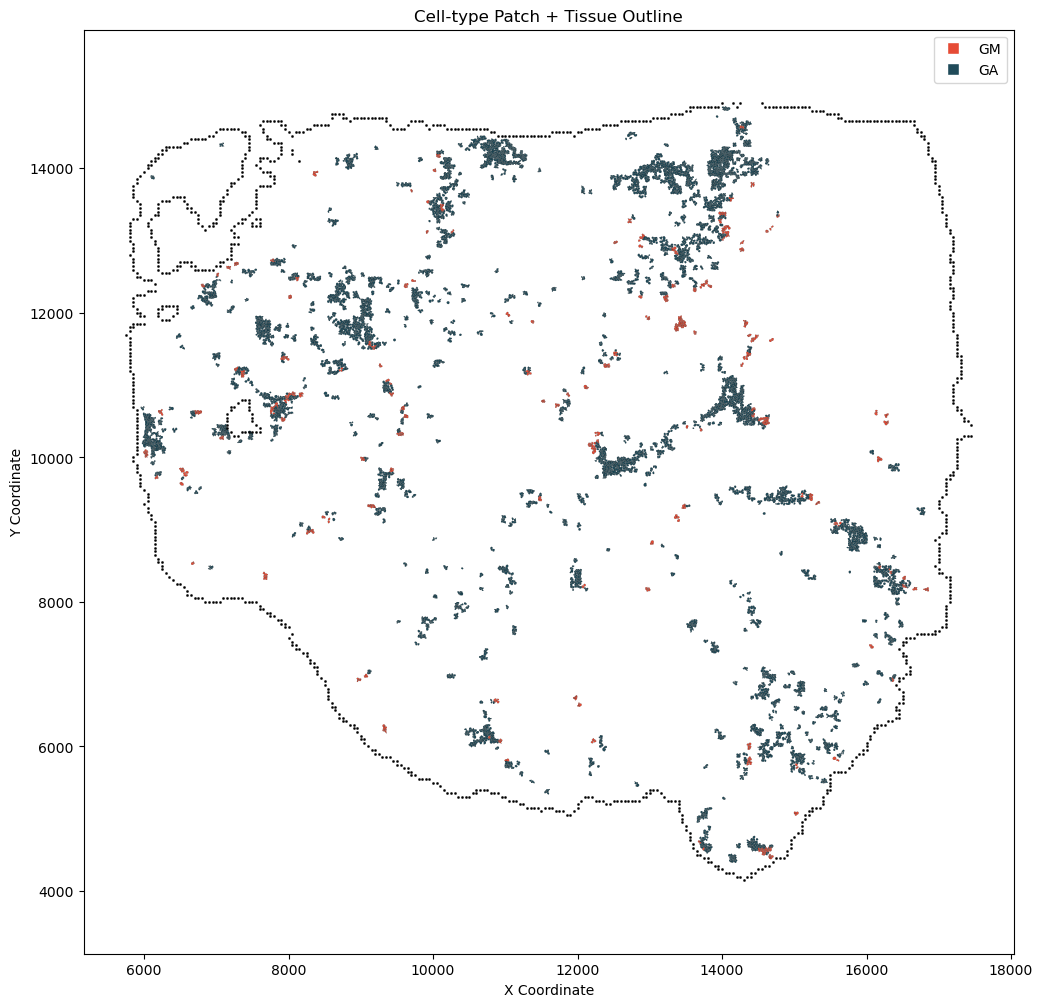

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.collections import PatchCollection
from scipy.interpolate import splprep, splev
import seaborn as sns

# ========= 1. Data Preparation =========
adata = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/all_sample_data/all_sample_celltype.h5ad')
meta = pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv', index_col=0)
adata.obs['loc'] = (
    adata.obs['batch'].astype(str) + '_' +
    adata.obs['bin50_x'].map(str) + '_' +
    adata.obs['bin50_y'].map(str)
)
adata.obs = adata.obs.merge(meta[['loc', 'LA_anno']], on='loc', how='left')
# Remove TLS_outer and TLS_inner (set as NaN)
adata.obs.loc[(adata.obs['batch'] == 'D06047A2') & (adata.obs['LA_anno'] == 'TLS_outer'), 'LA_anno'] = np.nan
adata.obs.loc[adata.obs['LA_anno'] == 'TLS_outer', 'LA_anno'] = np.nan
adata.obs.loc[adata.obs['LA_anno'] == 'TLS_inner', 'LA_anno'] = np.nan
# Use spatial for umap
adata.obsm['X_umap'] = adata.obsm['spatial']

df1 = adata.obs[adata.obs['batch'] == 'D06047A2'].reset_index()
adata1 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06047A2/test_analysis_celltype/D06047A2.h5ad')
tissue_outline = pd.DataFrame(adata1.uns['tissue_outline'], columns=['x', 'y'])

# === Prepare cell border coordinates ===
array_2d = adata1.obsm['cell_border'].reshape(-1, adata1.obsm['cell_border'].shape[-1])
df = pd.DataFrame(array_2d)
df['cellID'] = df.index // 32
df['cellID'] = df['cellID'].astype(str)
df.rename(columns={0: 'x', 1: 'y'}, inplace=True)
# Remove invalid marker points
df = df[(df['x'] != 32767) & (df['y'] != 32767)]
adata1.obs['cellID'] = adata1.obs['cellID'].astype(str)
df = pd.merge(df, adata1.obs[['x', 'y', 'cellID']], on='cellID', how='left')
df['x'] = df['x_x'] + df['x_y']
df['y'] = df['y_x'] + df['y_y']
df_cellborder = df[['cellID', 'x', 'y']]
df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)

# === Select cell groups for patches ===
data_GA = df1[df1['LA_anno'] == 'PCA_IGHG/A']
data_GM = df1[df1['LA_anno'] == 'PCA_IGHM']
data_GA['cellID'] = data_GA['cellID'].astype(int)
data_GM['cellID'] = data_GM['cellID'].astype(int)
cell_list1 = data_GA['cellID'].tolist()  # GA cellIDs
cell_list = data_GM['cellID'].tolist()   # GM cellIDs
cell_border = df_cellborder[df_cellborder['cellID'].isin(cell_list)]
cell_border1 = df_cellborder[df_cellborder['cellID'].isin(cell_list1)]

def border_list_from_df(cell_border_df):
    return [
        np.array(group[['x', 'y']].values)
        for _, group in cell_border_df.groupby('cellID') if len(group) >= 3
    ]
filtered_cell_borders_list = border_list_from_df(cell_border)
filtered_cell_borders_list1 = border_list_from_df(cell_border1)

# === Smoothing function for boundaries ===
def smooth_boundary(boundary, smoothness=0.5):
    x = boundary[:, 0]
    y = boundary[:, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.column_stack((x_new, y_new))

GM_COLOR = '#E64B35'
GA_COLOR = '#204B5A'
BG_COLOR = 'white'
TXT_COLOR = 'black'

# ========= 2. Plot 1: Patch + Outline =========
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)

# Add cell patches (smoothed)
patches = []
for cell_boundary in filtered_cell_borders_list:
    if len(cell_boundary) < 3: continue
    smooth = smooth_boundary(cell_boundary, 0.8)
    codes = [Path.LINETO] * len(smooth)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    patches.append(PathPatch(Path(smooth, codes),
                             edgecolor='black', facecolor=GM_COLOR, lw=0.1, antialiased=True))
for cell_boundary in filtered_cell_borders_list1:
    if len(cell_boundary) < 3: continue
    smooth = smooth_boundary(cell_boundary, 0.8)
    codes = [Path.LINETO] * len(smooth)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    patches.append(PathPatch(Path(smooth, codes),
                             edgecolor='black', facecolor=GA_COLOR, lw=0.1, antialiased=True))

ax.add_collection(PatchCollection(patches, match_original=True))

# Draw tissue outline points
sns.scatterplot(data=tissue_outline, x='x', y='y', color='black', s=3, edgecolor=None, ax=ax)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='GM', markerfacecolor=GM_COLOR, markersize=8, lw=0),
    Line2D([0], [0], marker='s', color='w', label='GA', markerfacecolor=GA_COLOR, markersize=8, lw=0)
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True)
ax.set_xlabel("X Coordinate", color=TXT_COLOR)
ax.set_ylabel("Y Coordinate", color=TXT_COLOR)
ax.tick_params(axis='both', colors=TXT_COLOR)
plt.grid(False)
plt.axis('equal')
plt.title("Cell-type Patch + Tissue Outline", color=TXT_COLOR)
plt.show()

# fig5N&O&P&Q

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)



--- Batch: D06047A2 ---


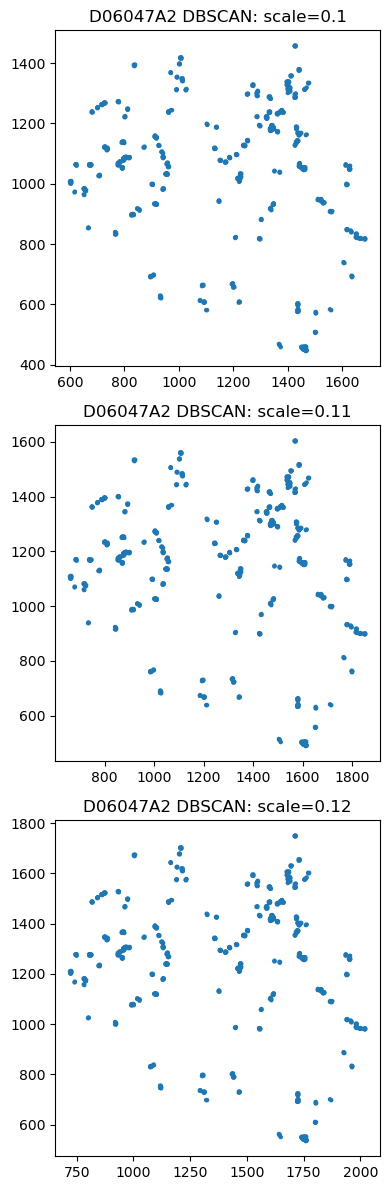


--- Batch: D06047C3 ---


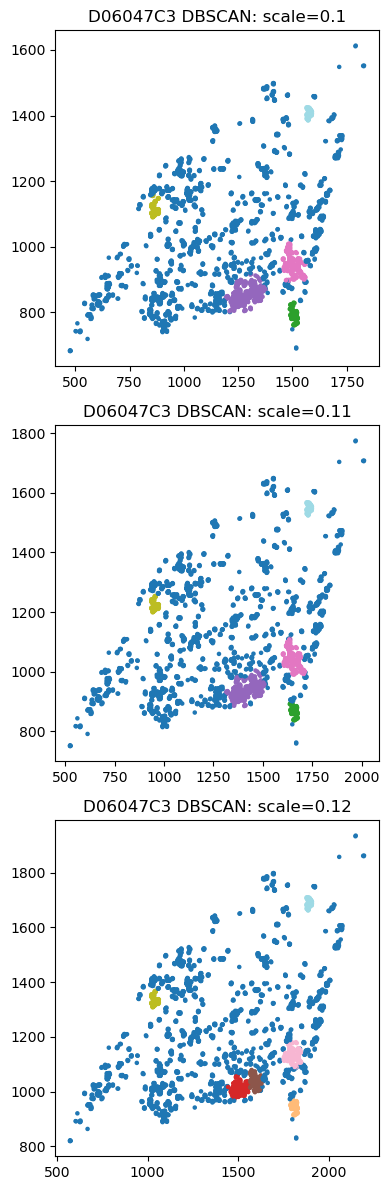


--- Batch: D06047D4 ---


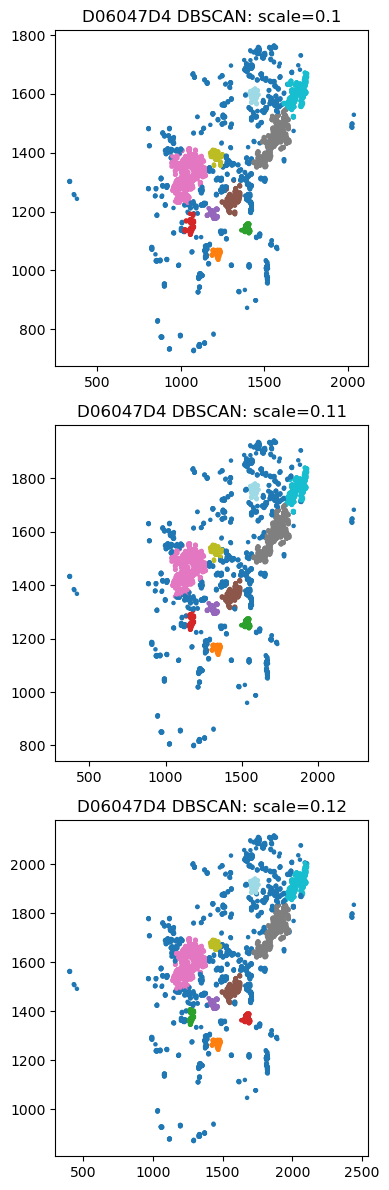


--- Batch: D06047E1 ---


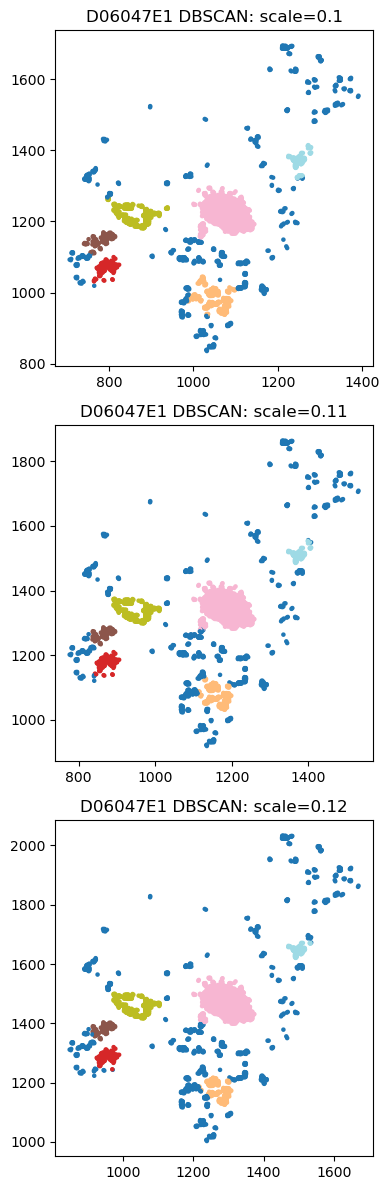


--- Batch: D06047E2 ---


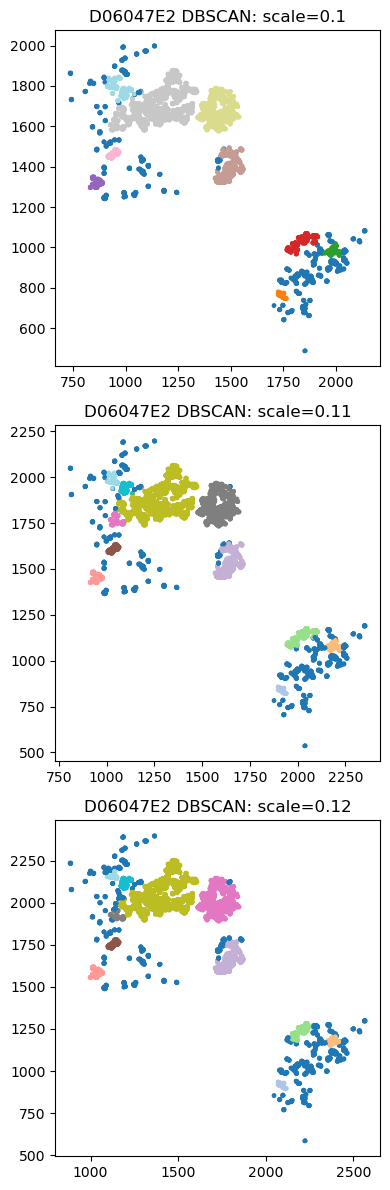


--- Batch: D06047F6 ---


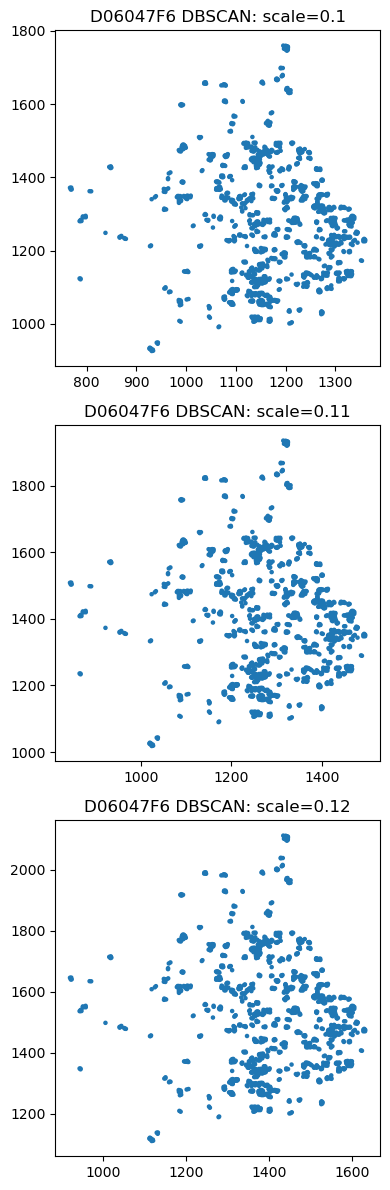


--- Batch: D06050A2 ---


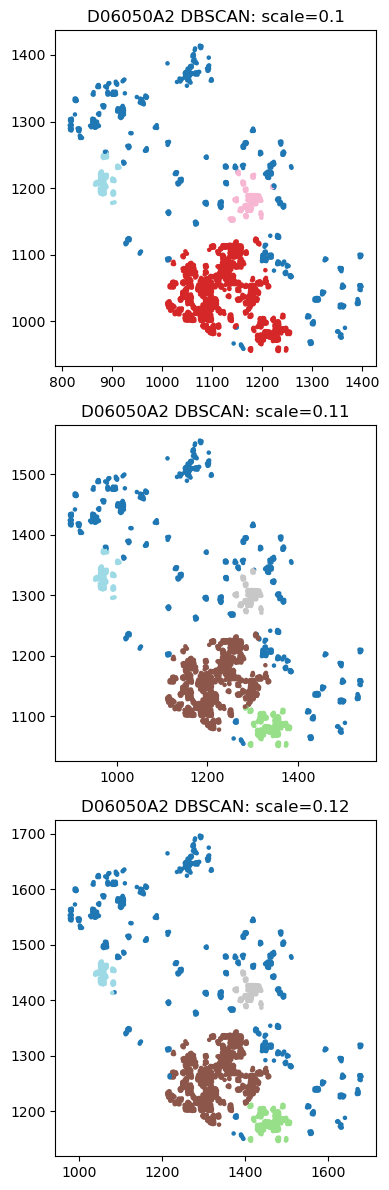


--- Batch: D06050C2 ---


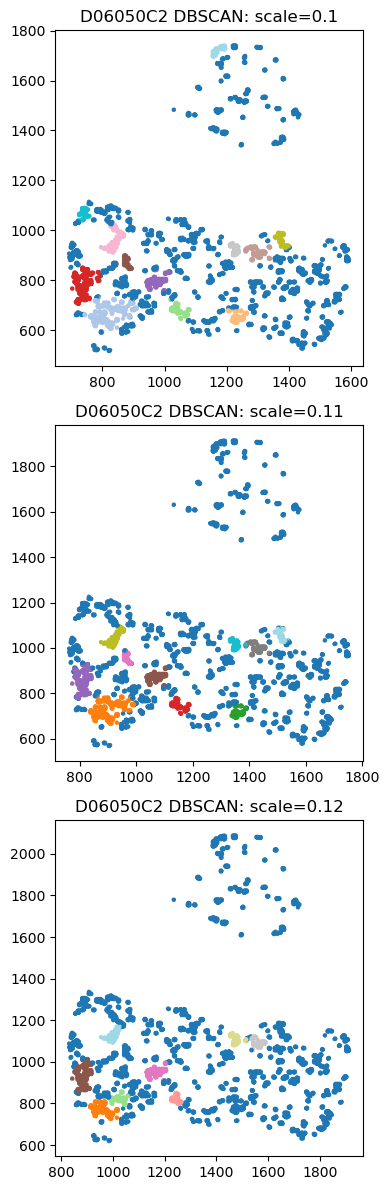


--- Batch: D06050D4 ---


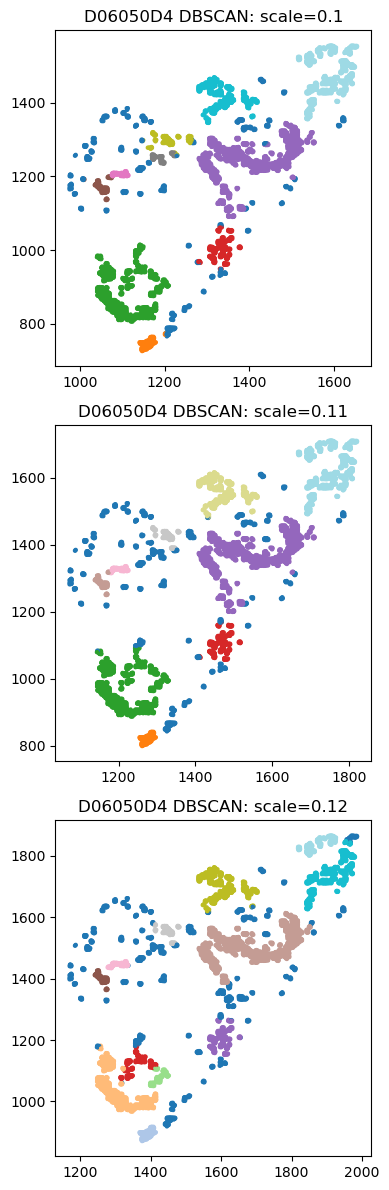


--- Batch: D06050E4 ---


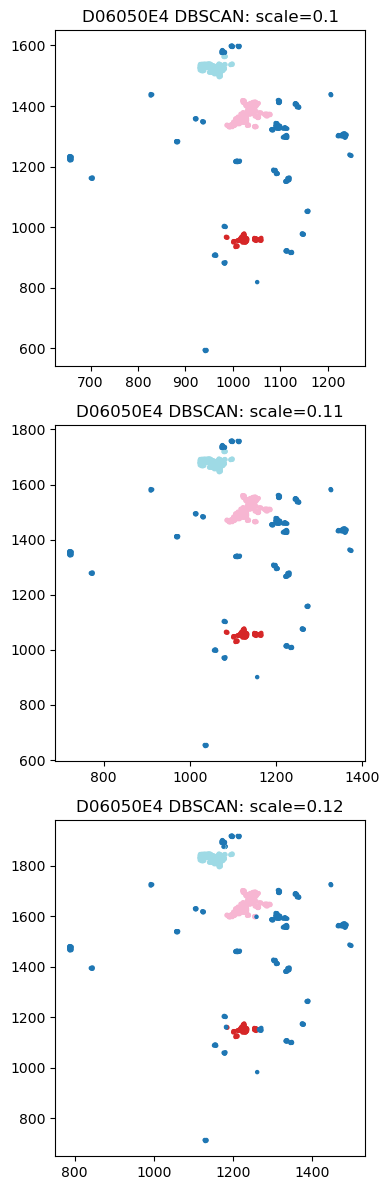


--- Batch: D06053D2 ---


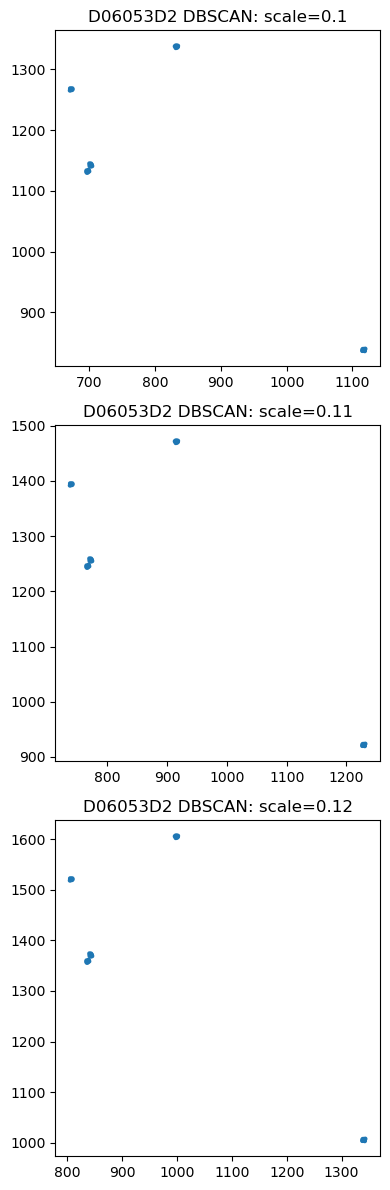

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


UMAP for batch: D06047A2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


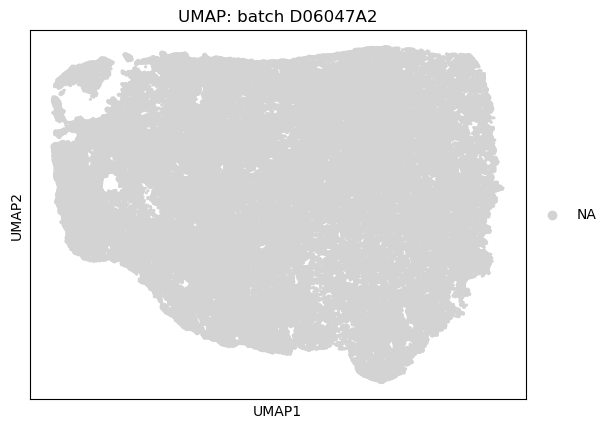

UMAP for batch: D06047C3


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


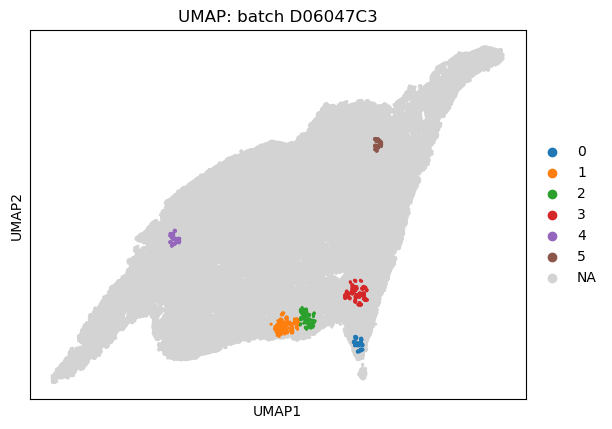

UMAP for batch: D06047D4


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


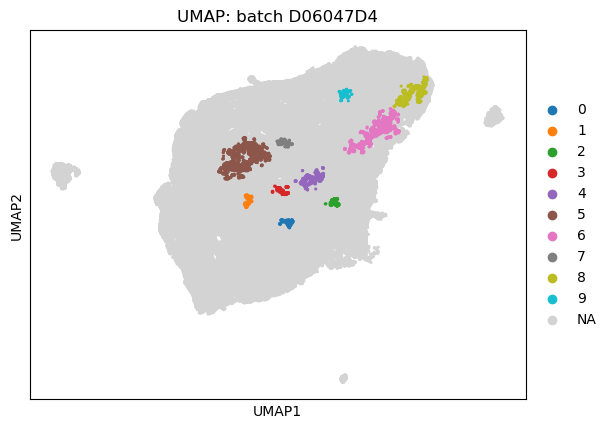

UMAP for batch: D06047E1


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


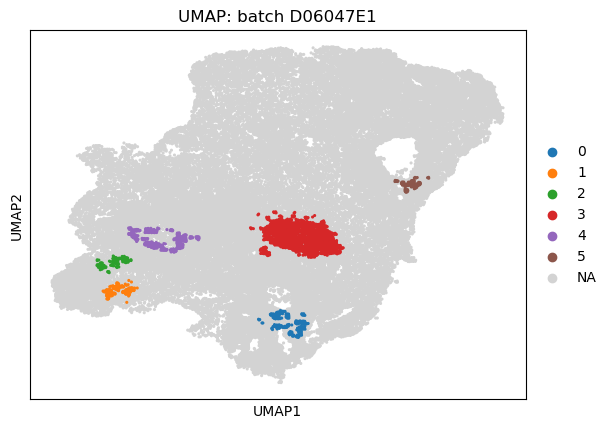

UMAP for batch: D06047E2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


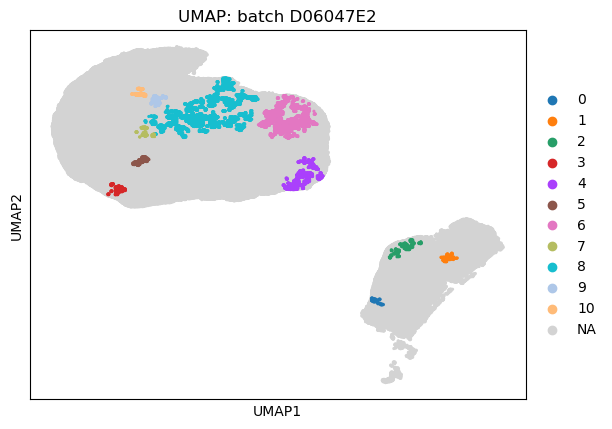

UMAP for batch: D06047F6


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


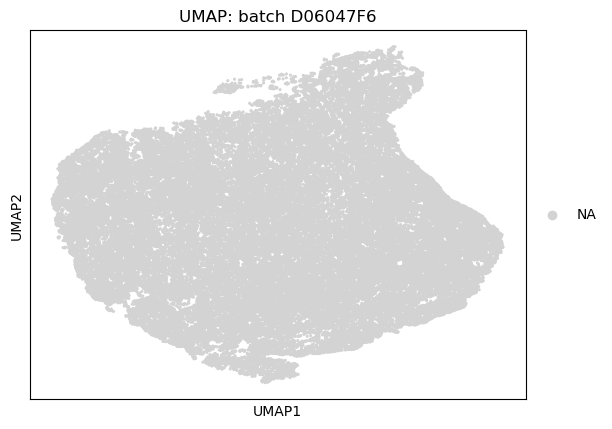

UMAP for batch: D06050A2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


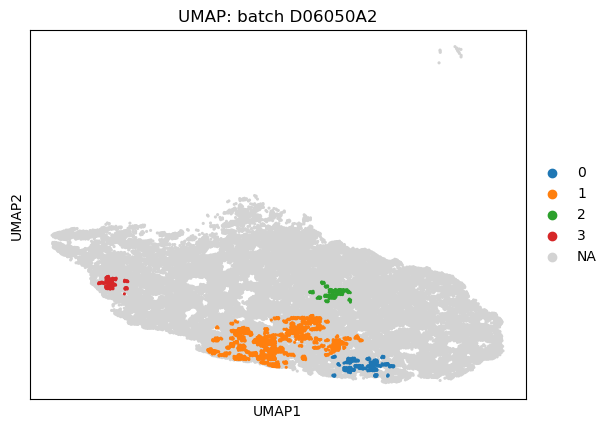

UMAP for batch: D06050C2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


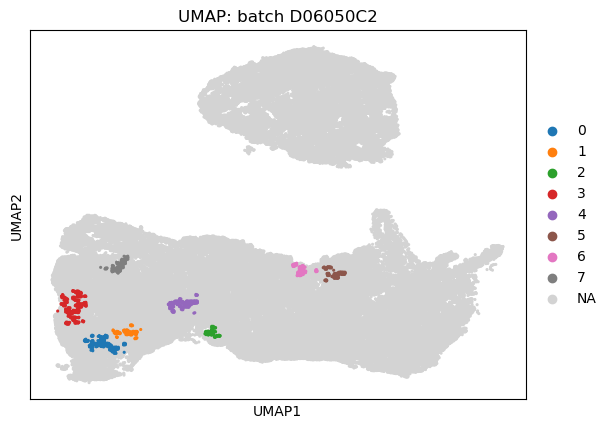

UMAP for batch: D06050D4


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


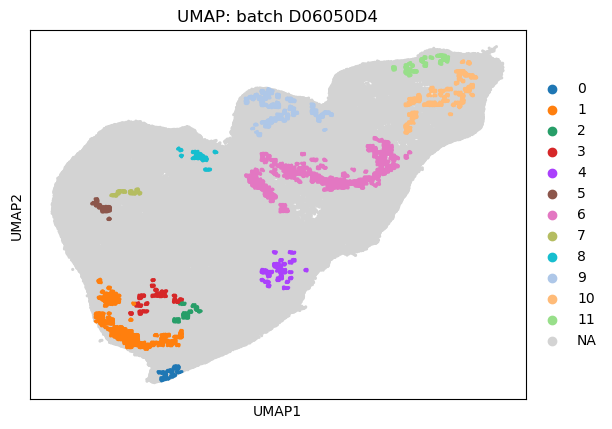

UMAP for batch: D06050E4


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


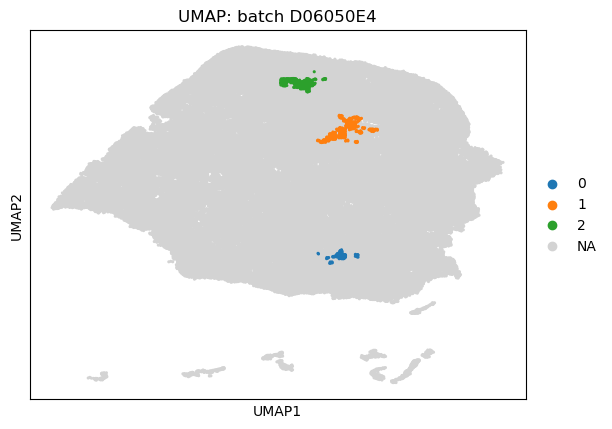

UMAP for batch: D06053D2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


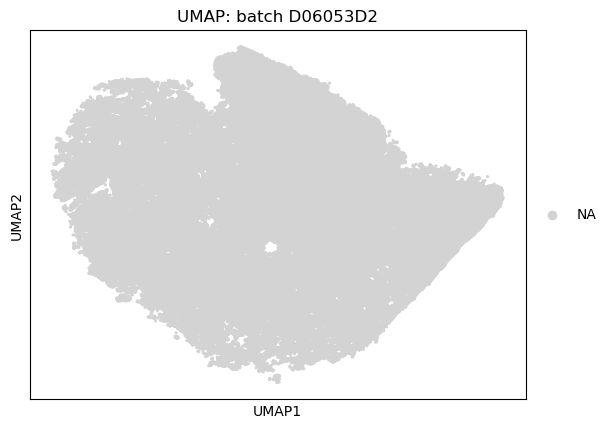


--- Batch: D06047A2 ---


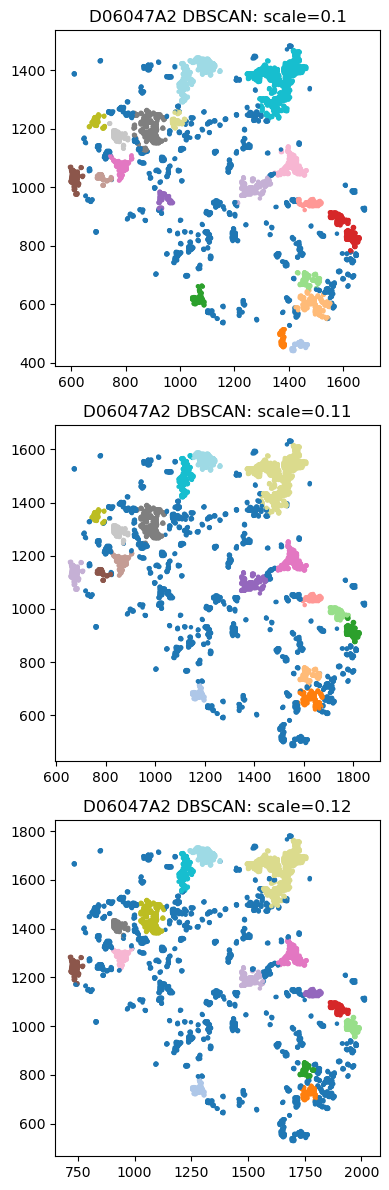


--- Batch: D06047C3 ---


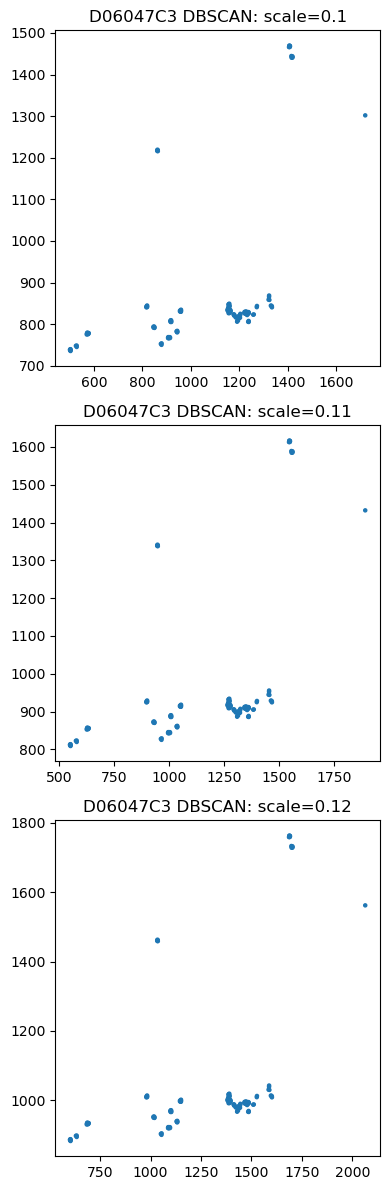


--- Batch: D06047D4 ---


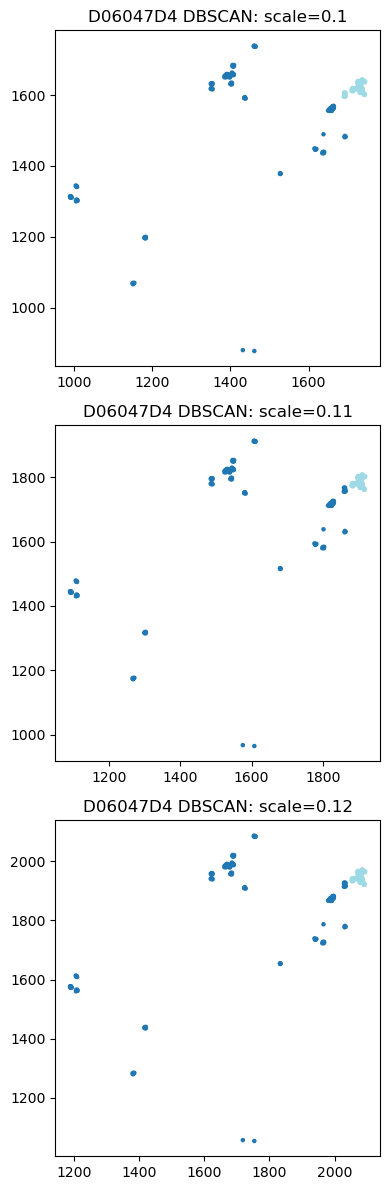


--- Batch: D06047E1 ---


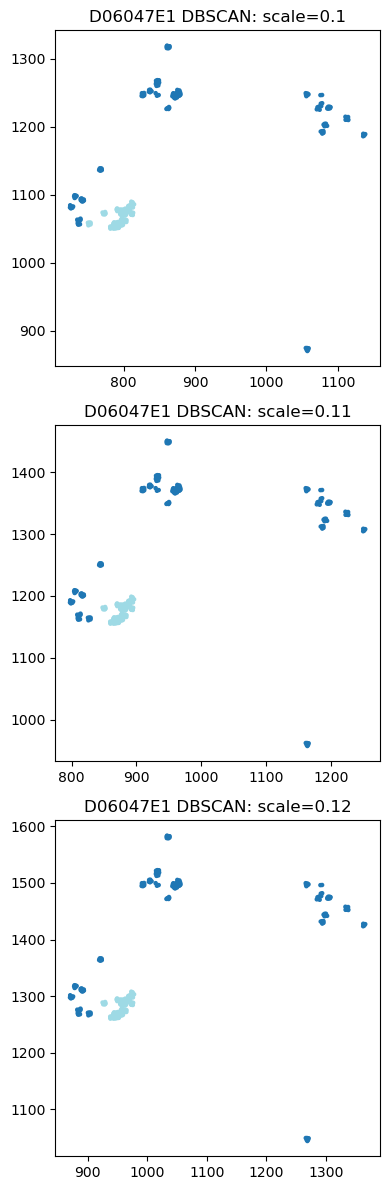


--- Batch: D06047E2 ---


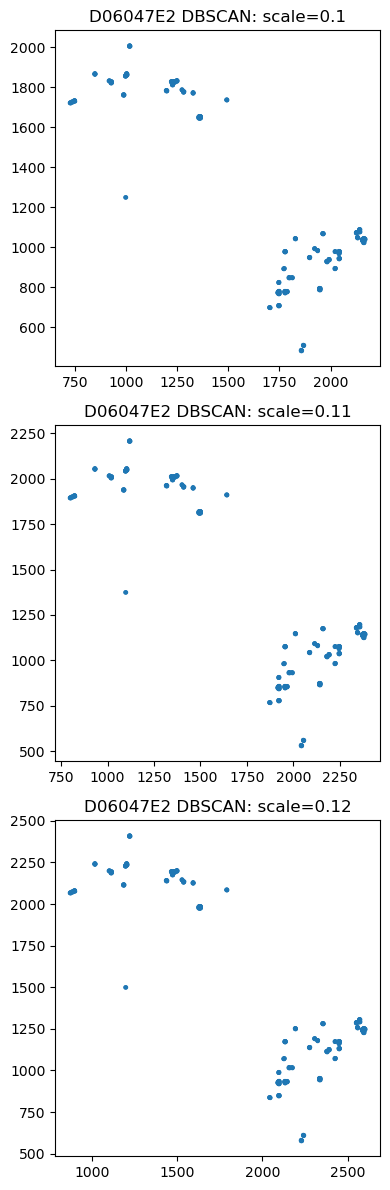


--- Batch: D06047F6 ---


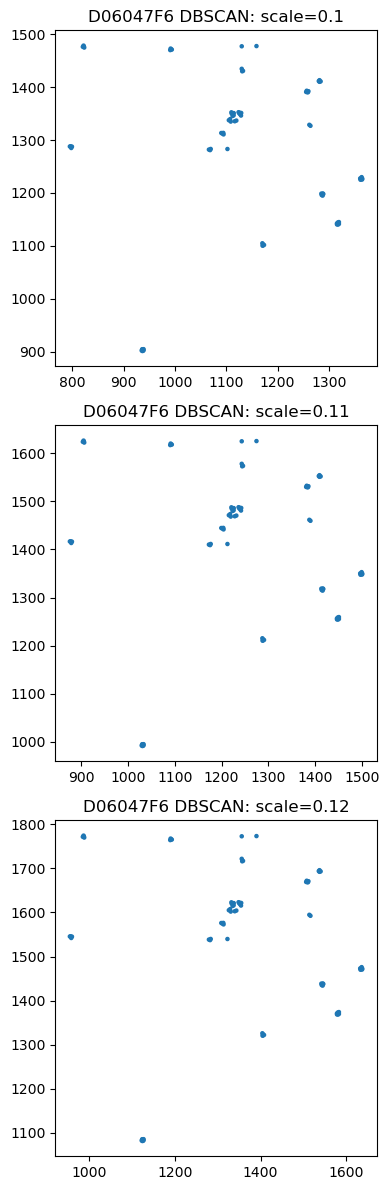


--- Batch: D06050A2 ---


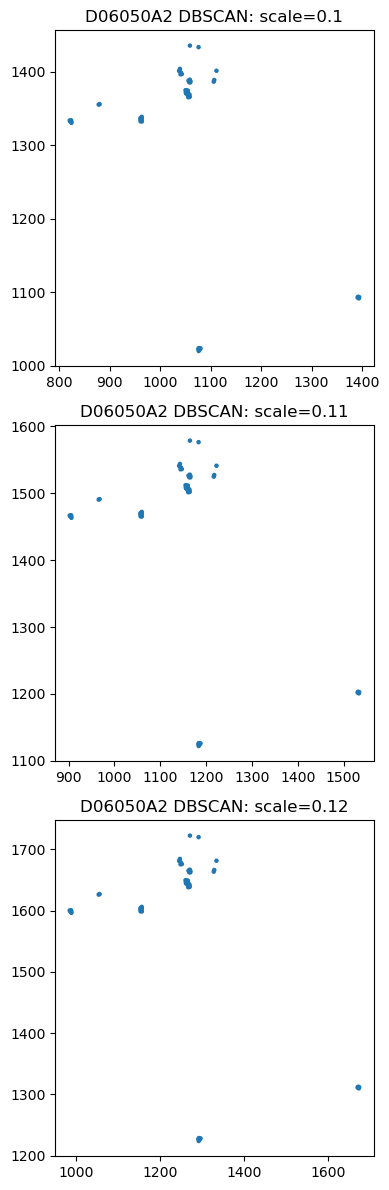


--- Batch: D06050C2 ---


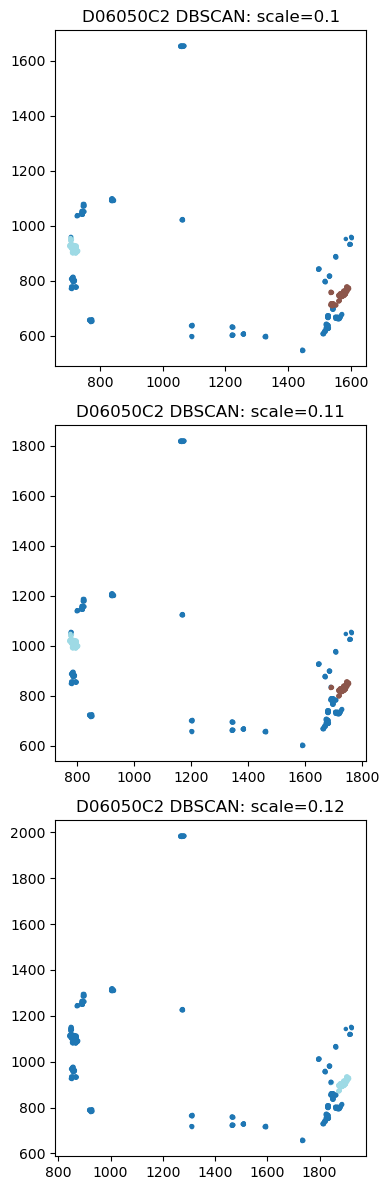


--- Batch: D06050D4 ---


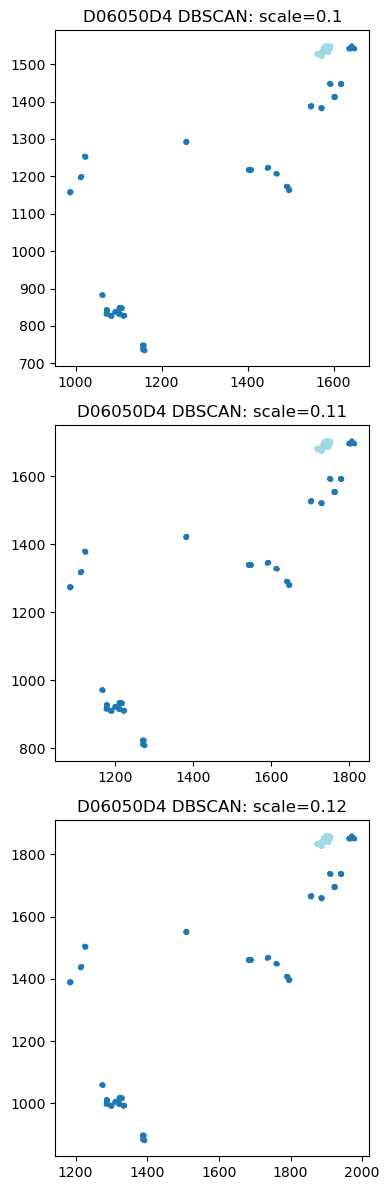


--- Batch: D06050E4 ---


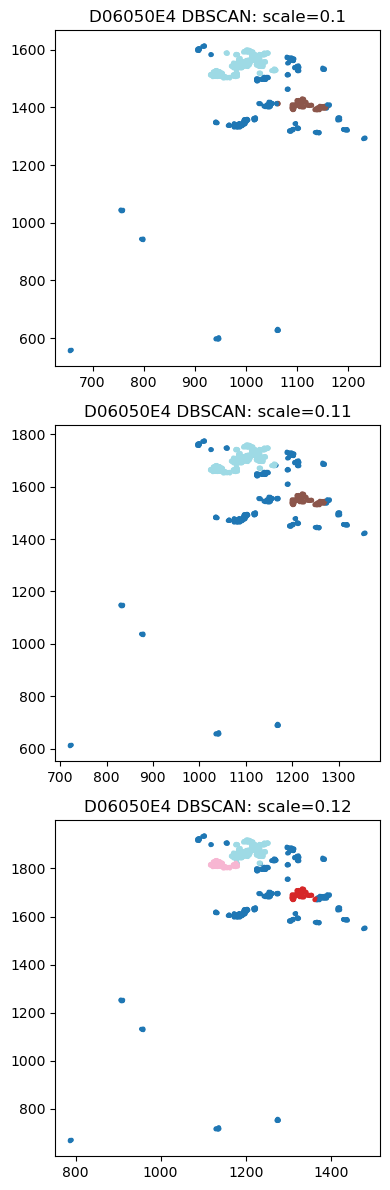


--- Batch: D06053D2 ---


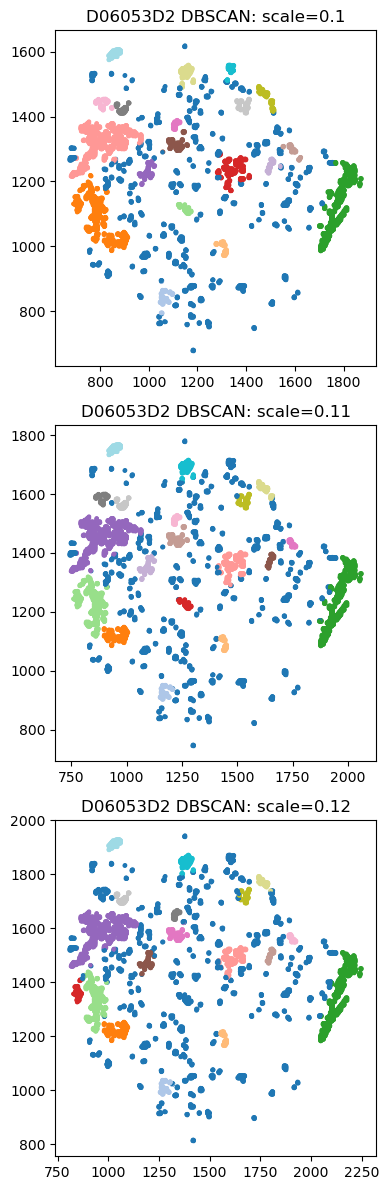

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


UMAP for batch: D06047A2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


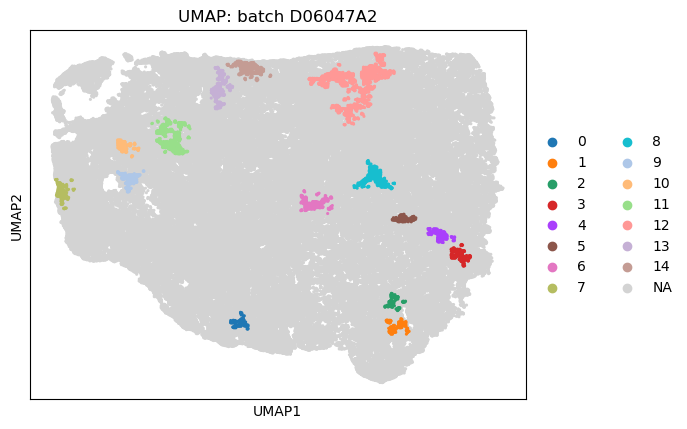

UMAP for batch: D06047C3


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


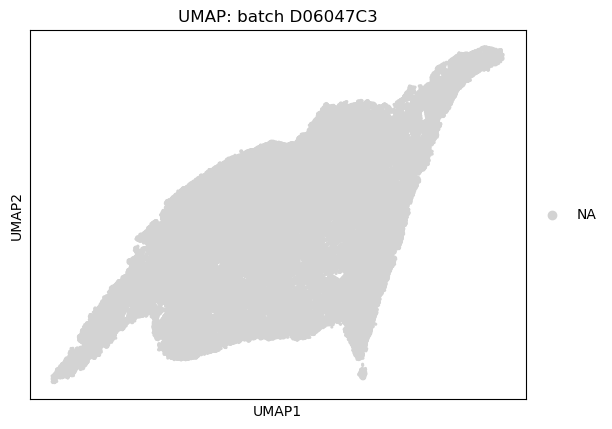

UMAP for batch: D06047D4


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


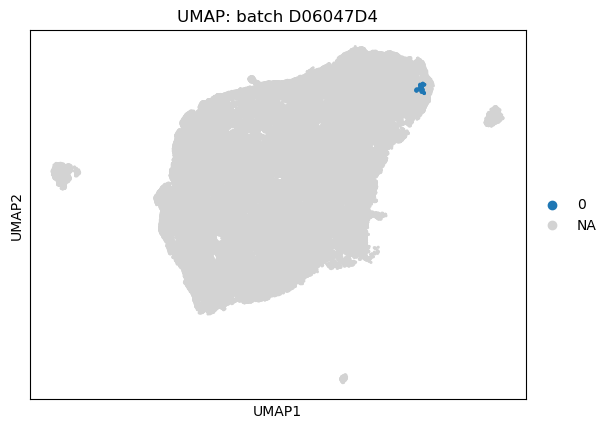

UMAP for batch: D06047E1


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


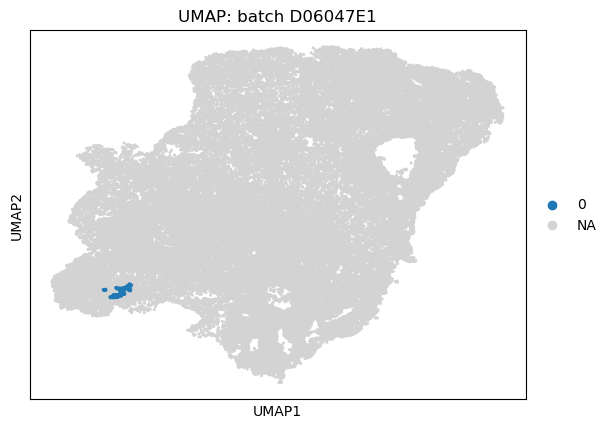

UMAP for batch: D06047E2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


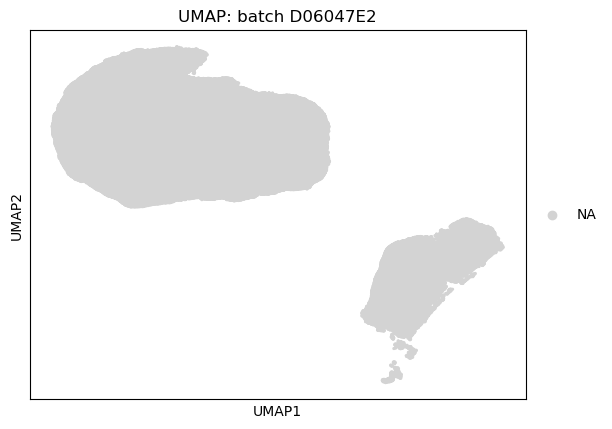

UMAP for batch: D06047F6


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


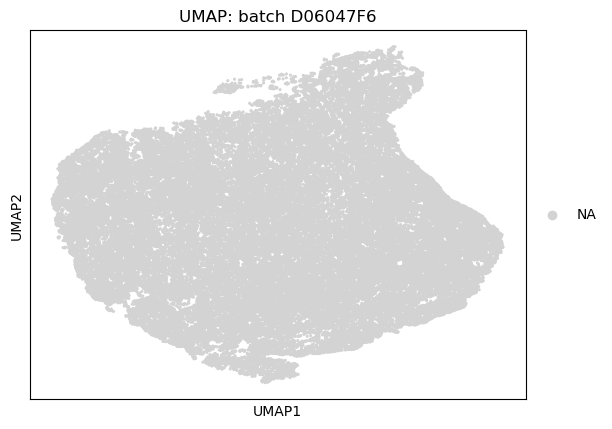

UMAP for batch: D06050A2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


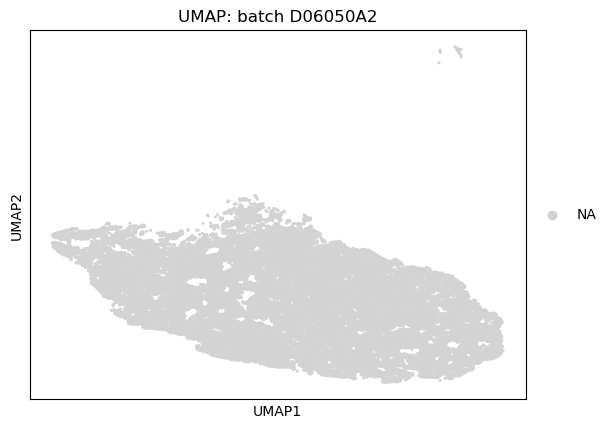

UMAP for batch: D06050C2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


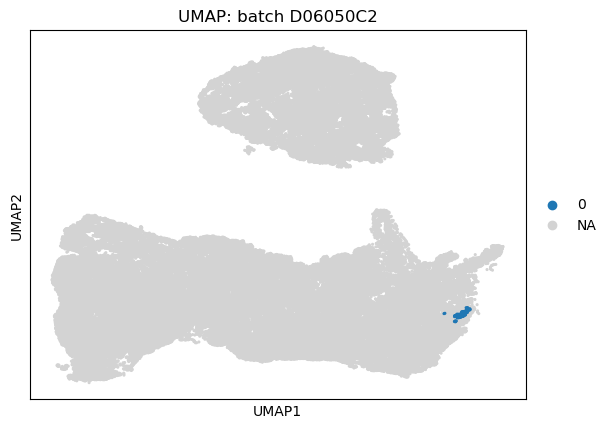

UMAP for batch: D06050D4


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


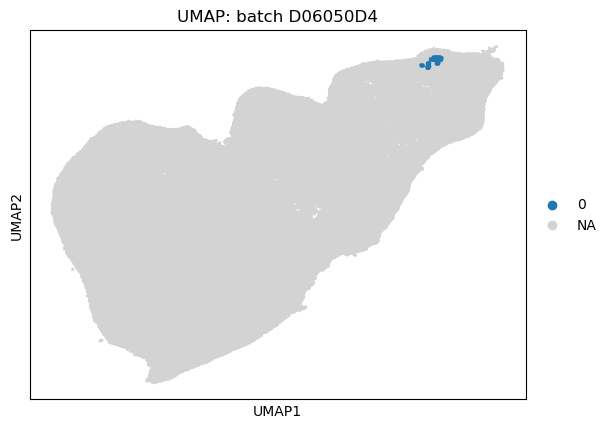

UMAP for batch: D06050E4


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


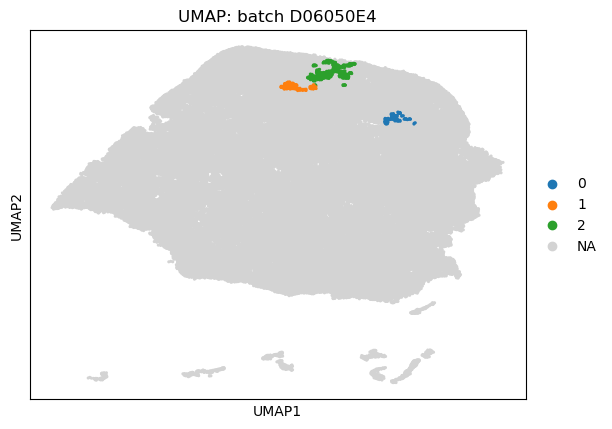

UMAP for batch: D06053D2


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


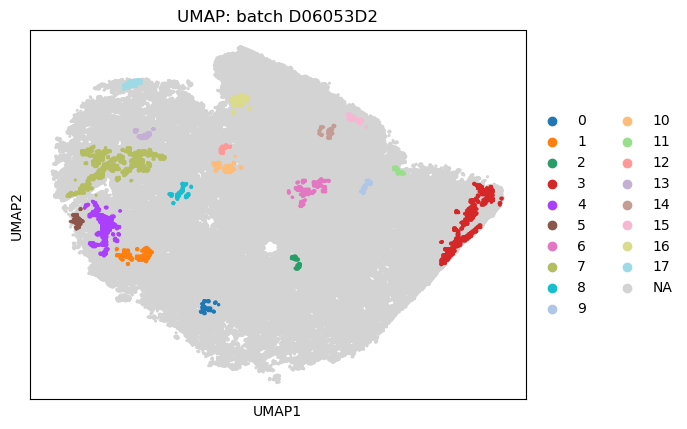

/tmp/ipykernel_2234570/3777893645.py:152: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs['PCAcluster'] = tmp.obs['batch'].astype(str) + '_' + tmp.obs['PCAcluster'].astype(str)
/tmp/ipykernel_2234570/3777893645.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA_sub_cluster'] = 'other'


Points remaining after outlier removal: 13
[After regression residual outlier removal] Pearson r = 0.516, p = 0.07111


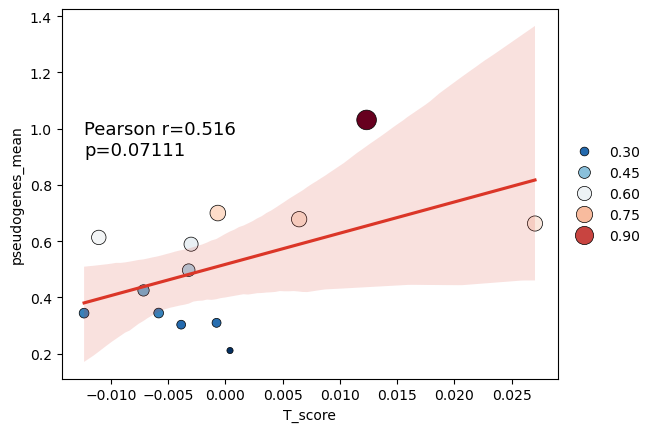

Points remaining after outlier removal: 13
[After regression residual outlier removal] Pearson r = 0.568, p = 0.04268


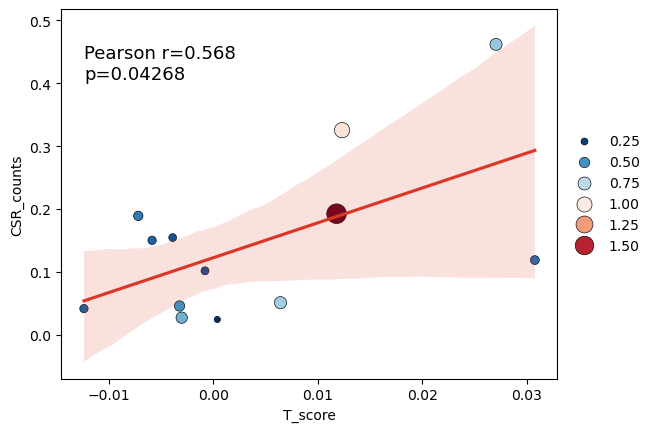

/tmp/ipykernel_2234570/3777893645.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA_sub_cluster'] = 'other'


Points remaining after outlier removal: 13
[After regression residual outlier removal] Pearson r = 0.722, p = 0.005352


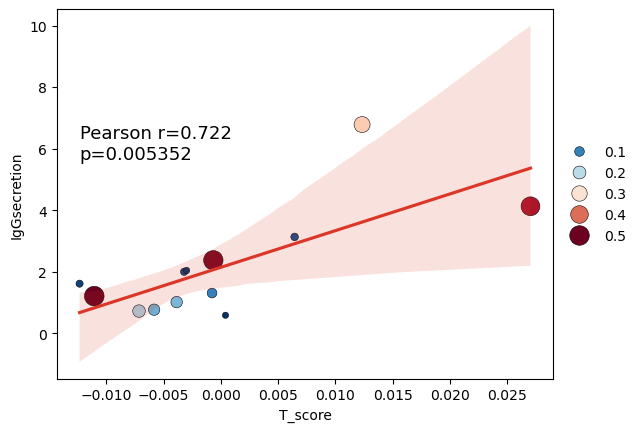

Points remaining after outlier removal: 14
[After regression residual outlier removal] Pearson r = 0.384, p = 0.1747


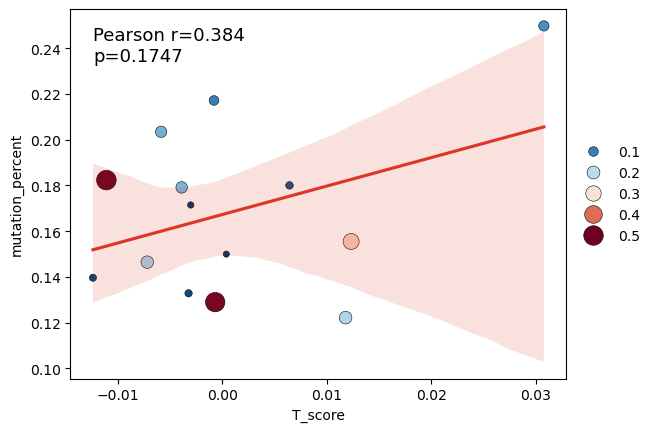

In [30]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from statsmodels.robust.scale import mad

# ========= Load and merge data =========
adata1 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06047A2/test_analysis_celltype/D06047A2.h5ad')
adata2 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06047C3/test_analysis_celltype/D06047C3.h5ad')
adata3 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06047D4/test_analysis_celltype/D06047D4.h5ad')
adata4 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06047E1/test_analysis_celltype/D06047E1.h5ad')
adata5 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06047E2/test_analysis_celltype/D06047E2.h5ad')
adata6 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06047F6/test_analysis_celltype/D06047F6.h5ad')
adata7 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06050A2/test_analysis_celltype/D06050A2.h5ad')
adata8 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06050C2/test_analysis_celltype/D06050C2.h5ad')
adata9 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06050D4/test_analysis_celltype/D06050D4.h5ad')
adata10 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06050E4/test_analysis_celltype/D06050E4.h5ad')
adata11 = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/D06053D2/test_analysis_celltype/D06053D2.h5ad')
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

meta = pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv', index_col=0)
adata.obs['loc'] = adata.obs['batch'].astype(str) + '_' + adata.obs['bin50_x'].map(str) + '_' + adata.obs['bin50_y'].map(str)
adata.obs = adata.obs.merge(meta[['loc', 'LA_anno']], on='loc', how='left')

# ========= DBSCAN spatial clustering (IGHM version) =========
def assign_dbscan_per_batch(adata, eps=30, min_samples=100, xy_col=['x','y'], anno_col='LA_anno', anno_val='PCA_IGHM', batch_col='batch', prefix='DNB_'):
    all_results = []
    scales = [0.1, 0.11, 0.12]
    for batch in adata.obs[batch_col].unique():
        print(f"\n--- Batch: {batch} ---")
        batch_mask = (adata.obs[batch_col] == batch)
        data = adata.obs.loc[batch_mask, :]
        TLScor = data[data[anno_col] == anno_val][['x', 'y']].copy()
        if len(TLScor) == 0:
            print(f"  Skip: {batch} has no points meeting condition ({anno_col}=={anno_val})")
            continue
        TLScor['label'] = anno_val
        X = TLScor[xy_col].to_numpy()
        # Multi-scale DBSCAN parameter tuning visualization
        fig, axes = plt.subplots(3, 1, figsize=(4, 12))
        for idx, scale in enumerate(scales):
            dbs = DBSCAN(eps=eps, min_samples=min_samples)
            dbs.fit(X * scale)
            labels = dbs.labels_
            scatter = axes[idx].scatter((X * scale)[:, 0], (X * scale)[:, 1], c=labels, cmap='tab20', s=5)
            axes[idx].set_title(f"{batch} DBSCAN: scale={scale}")
        plt.tight_layout()
        plt.show()
        # Use clustering from last scale as the final label
        dbs = DBSCAN(eps=eps, min_samples=min_samples)
        dbs.fit(X * scales[-1])
        TLScor['dbslabel'] = dbs.labels_
        TLScor = TLScor[~TLScor['dbslabel'].isin([-1])]
        TLScor['loc'] = prefix + TLScor['x'].astype(str) + '_' + TLScor['y'].astype(str)
        TLScor['batch'] = batch
        all_results.append(TLScor[['loc', 'batch', 'dbslabel']])
    if len(all_results) == 0:
        print("No batch has valid cluster points. Aborting and returning.")
        return adata
    cluster_df = pd.concat(all_results, axis=0, ignore_index=True)
    adata.obs['loc'] = prefix + adata.obs['x'].astype(str) + '_' + adata.obs['y'].astype(str)
    adata.obs['batch'] = adata.obs['batch'].astype(str)
    cluster_df['batch'] = cluster_df['batch'].astype(str)
    adata.obs = adata.obs.merge(cluster_df, on=['loc', 'batch'], how='left')
    adata.obs['PCA_IGHM_cluster'] = adata.obs['dbslabel'].astype('Int64').astype('category')
    del adata.obs['dbslabel']
    return adata

if __name__ == '__main__':
    adata = assign_dbscan_per_batch(adata)
    for batch in adata.obs['batch'].unique():
        print(f"UMAP for batch: {batch}")
        adata.obs.index = adata.obs.index.astype(str)
        adata_sub = adata[adata.obs['batch'] == batch].copy()
        adata_sub.obsm['X_umap'] = adata_sub.obsm['spatial']
        sc.pl.umap(
            adata_sub,
            color=['PCA_IGHM_cluster'],
            s=20,
            use_raw=False,
            title=f"UMAP: batch {batch}",
            #save=f"_PCA_IGHM_cluster_batch_{batch}.pdf"
        )

# ========= DBSCAN spatial clustering (IGHG/A version) =========
def assign_dbscan_per_batch(adata, eps=30, min_samples=100, xy_col=['x','y'], anno_col='LA_anno', anno_val='PCA_IGHG/A', batch_col='batch', prefix='DNB_'):
    all_results = []
    scales = [0.1, 0.11, 0.12]
    for batch in adata.obs[batch_col].unique():
        print(f"\n--- Batch: {batch} ---")
        batch_mask = (adata.obs[batch_col] == batch)
        data = adata.obs.loc[batch_mask, :]
        TLScor = data[data[anno_col] == anno_val][['x', 'y']].copy()
        if len(TLScor) == 0:
            print(f"  Skip: {batch} has no points meeting condition ({anno_col}=={anno_val})")
            continue
        TLScor['label'] = anno_val
        X = TLScor[xy_col].to_numpy()
        fig, axes = plt.subplots(3, 1, figsize=(4, 12))
        for idx, scale in enumerate(scales):
            dbs = DBSCAN(eps=eps, min_samples=min_samples)
            dbs.fit(X * scale)
            labels = dbs.labels_
            scatter = axes[idx].scatter((X * scale)[:, 0], (X * scale)[:, 1], c=labels, cmap='tab20', s=5)
            axes[idx].set_title(f"{batch} DBSCAN: scale={scale}")
        plt.tight_layout()
        plt.show()
        dbs = DBSCAN(eps=eps, min_samples=min_samples)
        dbs.fit(X * scales[-1])
        TLScor['dbslabel'] = dbs.labels_
        TLScor = TLScor[~TLScor['dbslabel'].isin([-1])]
        TLScor['loc'] = prefix + TLScor['x'].astype(str) + '_' + TLScor['y'].astype(str)
        TLScor['batch'] = batch
        all_results.append(TLScor[['loc', 'batch', 'dbslabel']])
    if len(all_results) == 0:
        print("No batch has valid cluster points. Aborting and returning.")
        return adata
    cluster_df = pd.concat(all_results, axis=0, ignore_index=True)
    adata.obs['loc'] = prefix + adata.obs['x'].astype(str) + '_' + adata.obs['y'].astype(str)
    adata.obs['batch'] = adata.obs['batch'].astype(str)
    cluster_df['batch'] = cluster_df['batch'].astype(str)
    adata.obs = adata.obs.merge(cluster_df, on=['loc', 'batch'], how='left')
    adata.obs['PCA_IGHG/A_cluster'] = adata.obs['dbslabel'].astype('Int64').astype('category')
    del adata.obs['dbslabel']
    return adata

if __name__ == '__main__':
    adata = assign_dbscan_per_batch(adata)
    for batch in adata.obs['batch'].unique():
        print(f"UMAP for batch: {batch}")
        adata.obs.index = adata.obs.index.astype(str)
        adata_sub = adata[adata.obs['batch'] == batch].copy()
        adata_sub.obsm['X_umap'] = adata_sub.obsm['spatial']
        sc.pl.umap(
            adata_sub,
            color=['PCA_IGHG/A_cluster'],
            s=20,
            use_raw=False,
            title=f"UMAP: batch {batch}",
            #save=f"_PCA_IGHG/A_cluster_batch_{batch}.pdf"
        )

# ========= Calculate score features (gene set scoring) =========
tmp = adata[adata.obs['PCAcluster'].notna()]
tmp.obs['PCAcluster'] = tmp.obs['batch'].astype(str) + '_' + tmp.obs['PCAcluster'].astype(str)
gene1 = pd.read_csv('/data1/zhangyang/Method/Review/Reviewer1/point.11/tmp1.csv')
genelist = gene1['GeneName'].tolist()
sc.tl.score_genes(tmp, genelist, score_name='pseudogenes')
sc.tl.score_genes(tmp, gene_list=['IGHG1', 'IGHG3', 'IGHG4'], score_name='IgGsecretion', use_raw=False)
sc.tl.score_genes(tmp, ['CD3E','CD3D','CD3G','TRAC','TRBC1','TRBC2'], score_name='T_score')

# ========= Cluster/subgroup info construction =========
df = tmp.obs
df = df[df['CSR'] != 'NA']
df['PCA_sub_cluster'] = 'other'
df.loc[df['PCA_IGHG/A_cluster'].notna(), 'PCA_sub_cluster'] = df['batch'].astype(str) + '_' + 'PCA_IGHG/A_cluster'
df.loc[df['PCA_IGHM_cluster'].notna(), 'PCA_sub_cluster'] = df['batch'].astype(str) + '_' + 'PCA_IGHM_cluster'
df = df[df['PCA_sub_cluster'] != 'other']

# ========= Aggregate metrics =========
out = (
    df
    .groupby('PCA_sub_cluster')
    .agg(
        CSR_counts=('CSR', lambda x: (x == 'yes').mean()),
        pseudogenes_mean=('pseudogenes', 'mean'),
        T_score=('T_score', 'mean')
    )
    .reset_index()
)
out = out[['PCA_sub_cluster', 'T_score', 'CSR_counts', 'pseudogenes_mean']]
out['pseudogenes_mean'] = out['pseudogenes_mean'] + 0.05

# ========= Plot 1: T_score VS pseudogenes =========
def regression_residual_outlier(x, y, threshold=5):
    x = np.asarray(x).reshape(-1, 1)
    y = np.asarray(y)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    resid = np.abs(y - y_pred)
    mad_resid = mad(resid)
    mask_inlier = resid <= threshold * mad_resid
    return mask_inlier

x = out['T_score'].values
y = out['pseudogenes_mean'].values
mask = regression_residual_outlier(x, y, threshold=3)
out_inlier = out[mask]
print(f'Points remaining after outlier removal: {out_inlier.shape[0]}')

sns.scatterplot(
    data=out_inlier,
    x='T_score',
    y='pseudogenes_mean',
    hue='pseudogenes_mean',
    sizes=(20, 200),
    size='pseudogenes_mean',
    palette='RdBu_r',
    edgecolor='black'
)
sns.regplot(
    data=out_inlier,
    marker=None,
    x='T_score',
    scatter=False,
    y='pseudogenes_mean',
    scatter_kws={'alpha': 0.7},
    line_kws={'color': '#DB3628'}
)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')
plt.grid(False)
r, p = pearsonr(out_inlier['pseudogenes_mean'].values, out_inlier['T_score'].values)
print(f"[After regression residual outlier removal] Pearson r = {r:.3f}, p = {p:.4g}")
plt.text(
    x=out_inlier['T_score'].min(),
    y=out_inlier['pseudogenes_mean'].max(),
    s=f"Pearson r={r:.3f}\np={p:.4g}",
    fontsize=13,
    ha='left',
    va='top',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)
plt.savefig('Figure5N_no_outlier.pdf', bbox_inches='tight',)
plt.show()

# ========= Plot 2: T_score VS CSR_counts =========
x = out['T_score'].values
y = out['CSR_counts'].values
mask = regression_residual_outlier(x, y, threshold=3)
out_inlier = out[mask]
print(f'Points remaining after outlier removal: {out_inlier.shape[0]}')
sns.scatterplot(
    data=out_inlier,
    x='T_score',
    y='CSR_counts',
    hue='pseudogenes_mean',
    sizes=(20, 200),
    size='pseudogenes_mean',
    palette='RdBu_r',
    edgecolor='black'
)
sns.regplot(
    data=out_inlier,
    marker=None,
    x='T_score',
    scatter=False,
    y='CSR_counts',
    scatter_kws={'alpha':0.7},
    line_kws={'color':'#DB3628'}
)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')
plt.grid(False)
r, p = pearsonr(out_inlier['T_score'].values, out_inlier['CSR_counts'].values)
print(f"[After regression residual outlier removal] Pearson r = {r:.3f}, p = {p:.4g}")
plt.text(
    x=out_inlier['T_score'].min(),
    y=out_inlier['CSR_counts'].max(),
    s=f"Pearson r={r:.3f}\np={p:.4g}",
    fontsize=13,
    ha='left',
    va='top',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)
plt.savefig('Figure5o_no_outlier.pdf', bbox_inches='tight',)
plt.show()

# ========= Aggregation with more features =========
df = tmp.obs
df = df[df['CSR'] != 'NA']
df['PCA_sub_cluster'] = 'other'
df.loc[df['PCA_IGHG/A_cluster'].notna(), 'PCA_sub_cluster'] = df['batch'].astype(str) + '_' + 'PCA_IGHG/A_cluster'
df.loc[df['PCA_IGHM_cluster'].notna(), 'PCA_sub_cluster'] = df['batch'].astype(str) + '_' + 'PCA_IGHM_cluster'
df = df[df['PCA_sub_cluster'] != 'other']

out = (
    df
    .groupby('PCA_sub_cluster')
    .agg(
        CSR_counts=('CSR', lambda x: (x == 'yes').mean()),
        IgGsecretion=('IgGsecretion', 'mean'),
        T_score=('T_score', 'mean'),
        mutation_percent=('mutation_percent', 'mean')
    )
    .reset_index()
)
out = out[['PCA_sub_cluster', 'T_score', 'CSR_counts', 'IgGsecretion', 'mutation_percent']]

# ========= Plot 3: T_score VS IgGsecretion =========
def regression_residual_outlier(x, y, threshold=5):
    x = np.asarray(x).reshape(-1, 1)
    y = np.asarray(y)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    resid = np.abs(y - y_pred)
    mad_resid = mad(resid)
    mask_inlier = resid <= threshold * mad_resid
    return mask_inlier

x = out['T_score'].values
y = out['IgGsecretion'].values
mask = regression_residual_outlier(x, y, threshold=3)
out_inlier = out[mask]
print(f'Points remaining after outlier removal: {out_inlier.shape[0]}')
sns.scatterplot(
    data=out_inlier,
    x='T_score',
    y='IgGsecretion',
    hue='CSR_counts',
    edgecolor='black',
    sizes=(20, 200),
    size='CSR_counts',
    palette='RdBu_r'
)
sns.regplot(
    data=out_inlier,
    marker=None,
    x='T_score',
    scatter=False,
    y='IgGsecretion',
    scatter_kws={'alpha':0.7},
    line_kws={'color':'#DB3628'}
)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')
plt.grid(False)
r, p = pearsonr(out_inlier['T_score'].values, out_inlier['IgGsecretion'].values)
print(f"[After regression residual outlier removal] Pearson r = {r:.3f}, p = {p:.4g}")
plt.text(
    x=out_inlier['T_score'].min(),
    y=out_inlier['IgGsecretion'].max(),
    s=f"Pearson r={r:.3f}\np={p:.4g}",
    fontsize=13,
    ha='left',
    va='top',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)
plt.savefig('Figure5P_no_outlier.pdf', bbox_inches='tight',)
plt.show()

# ========= Plot 4: T_score VS mutation_percent =========
out = out[out['mutation_percent'].notna()]
out = out.drop(10)
x = out['T_score'].values
y = out['mutation_percent'].values
mask = regression_residual_outlier(x, y, threshold=3)
out_inlier = out[mask]
print(f'Points remaining after outlier removal: {out_inlier.shape[0]}')
sns.scatterplot(
    data=out_inlier,
    x='T_score',
    y='mutation_percent',
    hue='CSR_counts',
    edgecolor='black',
    sizes=(20, 200),
    size='CSR_counts',
    palette='RdBu_r'
)
sns.regplot(
    data=out_inlier,
    marker=None,
    x='T_score',
    scatter=False,
    y='mutation_percent',
    scatter_kws={'alpha':0.7},
    line_kws={'color':'#DB3628'}
)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')
plt.grid(False)
r, p = pearsonr(out_inlier['T_score'].values, out_inlier['mutation_percent'].values)
print(f"[After regression residual outlier removal] Pearson r = {r:.3f}, p = {p:.4g}")
plt.text(
    x=out_inlier['T_score'].min(),
    y=out_inlier['mutation_percent'].max(),
    s=f"Pearson r={r:.3f}\np={p:.4g}",
    fontsize=13,
    ha='left',
    va='top',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)
plt.savefig('Figure5q_no_outlier.pdf', bbox_inches='tight',)
plt.show()

# fig5R

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/tmp/ipykernel_2234570/1807061211.py:72: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped b

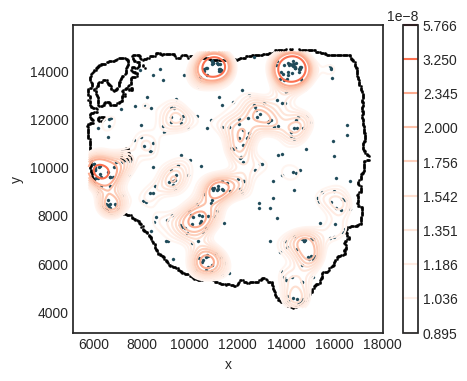

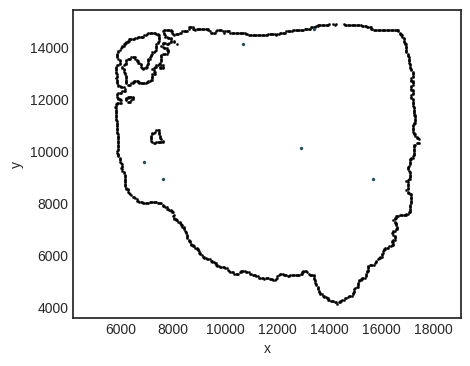

In [31]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1. Load AnnData objects
# --------------------------
data_paths = [
    '/data3/zhangyang/Method_Final_analysis/D06047A2/test_analysis_celltype/D06047A2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047C3/test_analysis_celltype/D06047C3.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047D4/test_analysis_celltype/D06047D4.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047E1/test_analysis_celltype/D06047E1.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047E2/test_analysis_celltype/D06047E2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047F6/test_analysis_celltype/D06047F6.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050A2/test_analysis_celltype/D06050A2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050C2/test_analysis_celltype/D06050C2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050D4/test_analysis_celltype/D06050D4.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050E4/test_analysis_celltype/D06050E4.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06053D2/test_analysis_celltype/D06053D2.h5ad',
]

batch_categories = [
    "D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6",
    "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"
]

# Load all AnnData objects and ensure unique variable names
adata_list = [sc.read_h5ad(path) for path in data_paths]
for adata in adata_list:
    adata.var_names_make_unique()

# --------------------------
# 2. Merge AnnData objects
# --------------------------
adata = adata_list[0].concatenate(
    adata_list[1:],
    batch_key="batch",
    batch_categories=batch_categories
)

# --------------------------
# 3. Annotate merged AnnData
# --------------------------
# Generate loc key for matching meta
meta = pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv', index_col=0)
adata.obs['loc'] = (
    adata.obs['batch'].astype(str) + "_" +
    adata.obs['bin50_x'].map(str) + "_" +
    adata.obs['bin50_y'].map(str)
)
# Merge meta annotation
adata.obs = adata.obs.merge(meta[['loc', 'LA_anno']], on='loc', how='left')

# --------------------------
# 4. Figure generation loop - main view
# --------------------------
# List of (AnnData object, batch label) to visualize
plot_pairs = [
    (adata_list[0], "D06047A2"),
    # Add (adata_list[index], "batch_label") as needed, e.g. (adata_list[10], "D06053D2"),
]

for m, i in plot_pairs:
    # Get CDR3aa sequences of interest
    subset_obs = adata.obs[adata.obs['batch'] == i]
    clonotypes = subset_obs[
        (subset_obs['LA_anno'] == 'PCA_IGHG/A') & (subset_obs['TRBcdr3aa'].notna())
    ]['TRBcdr3aa'].unique().tolist()

    # Prepare data and plotting
    plt.style.use('seaborn-white')
    plt.figure(figsize=(5, 4))
    plt.grid(False)
    plt.axis('equal')

    # Plot tissue outline
    tissue_outline = pd.DataFrame(m.uns['tissue_outline'], columns=['x', 'y'])
    sns.scatterplot(
        data=tissue_outline, x='x', y='y', color='black', s=3, edgecolor=None
    )

    obs_tmp = m.obs
    obs_tmp['bin50 structural annotation'] = obs_tmp['bin50 structural annotation'].astype(str)
    df_in = obs_tmp[obs_tmp['TRBcdr3aa'].isin(clonotypes)]
    df_plot = df_in[~df_in['bin50 structural annotation'].isin(['LA-TLS', 'LA-PCA'])]

    # Plot point and density for selected clonotypes, excluding LA-TLS/LA-PCA annotated bins
    sns.scatterplot(
        data=df_plot, x='x', y='y', color='#204B5A', s=5, edgecolor=None
    )
    sns.kdeplot(
        data=df_plot, x='x', y='y',
        fill=False, cmap='Reds', bw_adjust=0.4, thresh=0.3,
        kernel='linear', cut=0.5, cbar=True
    )
    plt.savefig(f'Figure5R_in_{i}_overview.png', dpi=600, bbox_inches='tight')
    plt.show()

    # # Uncomment for other plots such as points not in "in-tissue" clonotype - see below

# --------------------------
# 5. Figure generation loop - zoom-in and comparison
# --------------------------
for m, i in plot_pairs:
    subset_obs = adata.obs[adata.obs['batch'] == i]
    clonotypes = subset_obs[
        (subset_obs['LA_anno'] == 'PCA_IGHG/A') & (subset_obs['TRBcdr3aa'].notna())
    ]['TRBcdr3aa'].unique().tolist()

    # Define and plot features for cells NOT in clonotype list (but notna)
    obs_tmp = m.obs
    obs_tmp['bin50 structural annotation'] = obs_tmp['bin50 structural annotation'].astype(str)
    df_notin = obs_tmp[(~obs_tmp['TRBcdr3aa'].isin(clonotypes)) & (obs_tmp['TRBcdr3aa'].notna())]
    df_notin_plot = df_notin[~df_notin['bin50 structural annotation'].isin(['LA-TLS', 'LA-PCA'])]

    plt.figure(figsize=(5, 4))
    plt.axis('equal')
    plt.grid(False)
    # Plot tissue outline
    tissue_outline = pd.DataFrame(m.uns['tissue_outline'], columns=['x', 'y'])
    sns.scatterplot(
        data=tissue_outline, x='x', y='y', color='black', s=3, edgecolor=None
    )
    # Plot points as above, for cells NOT in selected clonotype list
    sns.scatterplot(
        data=df_notin_plot, x='x', y='y', color='#204B5A', s=5, edgecolor=None
    )
    plt.savefig(f'Figure5R_notin_{i}_zoomin.png', dpi=2500, bbox_inches='tight')
    plt.show()

# fig5S

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


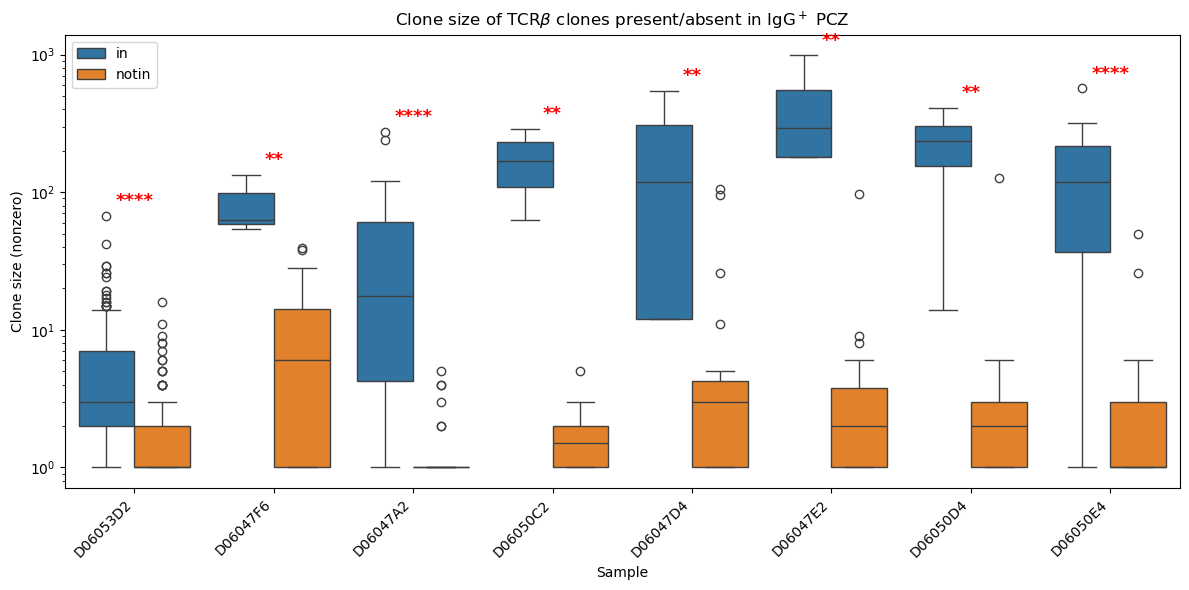

In [33]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# ========== PART 1: Compute Clone Counts Matrix ==========

# -- Load all adata objects, ensuring unique var names --
data_paths = [
    '/data3/zhangyang/Method_Final_analysis/D06047A2/test_analysis_celltype/D06047A2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047C3/test_analysis_celltype/D06047C3.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047D4/test_analysis_celltype/D06047D4.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047E1/test_analysis_celltype/D06047E1.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047E2/test_analysis_celltype/D06047E2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06047F6/test_analysis_celltype/D06047F6.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050A2/test_analysis_celltype/D06050A2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050C2/test_analysis_celltype/D06050C2.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050D4/test_analysis_celltype/D06050D4.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06050E4/test_analysis_celltype/D06050E4.h5ad',
    '/data3/zhangyang/Method_Final_analysis/D06053D2/test_analysis_celltype/D06053D2.h5ad'
]
batch_categories = [
    "D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6",
    "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"
]
adata_list = [sc.read_h5ad(path) for path in data_paths]
for adata in adata_list:
    adata.var_names_make_unique()

# -- Merge AnnData objects into one with batch --
adata = adata_list[0].concatenate(
    adata_list[1:], batch_key="batch", batch_categories=batch_categories
)

# -- Merge LA_anno from meta by match location --
meta = pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv', index_col=0)
adata.obs['loc'] = (
    adata.obs['batch'].astype(str) + "_" + 
    adata.obs['bin50_x'].astype(str) + "_" +
    adata.obs['bin50_y'].astype(str)
)
adata.obs = adata.obs.merge(meta[['loc', 'LA_anno']], on='loc', how='left')

# -- Batch order to use in output (edit as desired) --
batch_categories_plot = [
    'D06053D2', 'D06047C3', 'D06047F6', 'D06047E1', 'D06050A2',
    'D06047A2', 'D06050C2', 'D06047D4', 'D06047E2', 'D06050D4', 'D06050E4'
]

# -- Compute counts matrix ("in" = PCA_IGHG/A, "notin" = other) --
result_df = pd.DataFrame()
for batch in batch_categories_plot:
    batch_data = adata.obs[adata.obs['batch'] == batch]
    target_sequences = batch_data[
        (batch_data['LA_anno'] == 'PCA_IGHG/A') & (batch_data['TRBcdr3aa'].notna())
    ]['TRBcdr3aa'].tolist()
    
    in_counts = batch_data[batch_data['TRBcdr3aa'].isin(target_sequences)] \
        ['TRBcdr3aa'].value_counts().rename(f'{batch}_in')
    notin_counts = batch_data[(~batch_data['TRBcdr3aa'].isin(target_sequences)) & 
                              (batch_data['TRBcdr3aa'].notna())]['TRBcdr3aa'].value_counts().rename(f'{batch}_notin')
    batch_df = pd.concat([in_counts, notin_counts], axis=1)
    result_df = pd.concat([result_df, batch_df], axis=1)

result_df = result_df.fillna(0).astype(int).reset_index()

# Remove leftover index columns if present
for col in ['TRBcdr3aa', 'index']:
    if col in result_df.columns:
        result_df = result_df.drop(columns=[col])

# Save as CSV (edit output path as needed)
result_df.to_csv('./fig5S_counts_matrix.csv', index=False)

# ========== PART 2: Statistical Analysis & Visualization ==========

# --- Load the counts matrix ---
result_df = pd.read_csv('./fig5S_counts_matrix.csv')

# --- (Optional) exclude problematic batches before plotting ---
exclude_batches = [
    "D06047C3", "D06047E1", "D06050A2"
]
for b in exclude_batches:
    for suffix in ["_in", "_notin"]:
        col = f"{b}{suffix}"
        if col in result_df.columns:
            del result_df[col]

# --- Identify available groups (samples) ---
group_names = []
for c in result_df.columns:
    if c.endswith('_in'):
        group = c.replace('_in', '')
        if f"{group}_notin" in result_df.columns:
            group_names.append(group)

# --- Mann-Whitney U-test between "in" and "notin" (per group) ---
results = []
for group in group_names:
    in_col = f"{group}_in"
    notin_col = f"{group}_notin"
    in_vals = result_df[in_col].replace(0, np.nan).dropna()
    notin_vals = result_df[notin_col].replace(0, np.nan).dropna()
    if len(in_vals) > 0 and len(notin_vals) > 0:
        stat, p = mannwhitneyu(in_vals, notin_vals, alternative='two-sided')
    else:
        stat, p = np.nan, np.nan
    results.append({
        "Sample": group,
        "in_median": in_vals.median(),
        "notin_median": notin_vals.median(),
        "U_stat": stat,
        "p_value": p,
        "in_n": len(in_vals),
        "notin_n": len(notin_vals)
    })
diff_df = pd.DataFrame(results)

# --- FDR adjust p-values (Benjamini-Hochberg) ---
_, p_adj, _, _ = multipletests(diff_df['p_value'].fillna(1), method='fdr_bh')
diff_df['p_adj'] = p_adj

def pval_to_stars(p):
    if p < 0.0001:
        return '****'
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'
diff_df['sig'] = diff_df['p_adj'].apply(pval_to_stars)

# --- Prepare long-format for boxplot ---
plot_data = []
for group in group_names:
    for label in ['in', 'notin']:
        col = f"{group}_{label}"
        vals = result_df[col].replace(0, np.nan).dropna().values
        plot_data.extend([
            {"Group": group, "Category": label, "Count": v} for v in vals
        ])
plot_df = pd.DataFrame(plot_data)

# --- Create the boxplot ---
plt.rcdefaults()
plt.style.use('default')
plt.figure(figsize=(max(12, 1.5 * len(group_names)), 6))
ax = sns.boxplot(data=plot_df, x='Group', y='Count', hue='Category')
plt.xlabel('Sample')
plt.ylabel('Clone size (nonzero)')
plt.title(r'Clone size of TCR$\beta$ clones present/absent in IgG$^+$ PCZ')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.legend(title="", loc='upper left')

# --- Annotate significance stars ---
ymaxs = plot_df.groupby('Group')['Count'].max()
for i, row in enumerate(diff_df.itertuples()):
    group = row.Sample
    sig = row.sig
    y = ymaxs[group] * 1.10 if not np.isnan(ymaxs[group]) else 1
    xloc = i
    # The position may need tuning if categories are not paired left/right
    ax.text(
        xloc, y, sig,
        ha='center', va='bottom', color='red', fontsize=13, fontweight='bold'
    )

plt.tight_layout()
plt.savefig('fig5s.pdf')
plt.show()

# fig5T

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


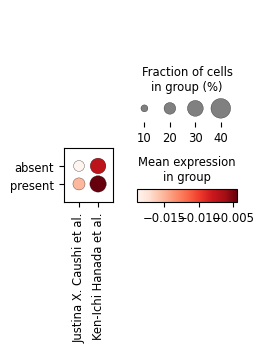

In [35]:
import scanpy as sc
import pandas as pd

# --- 1. Load integrated AnnData and meta annotation ---
adata = sc.read_h5ad('/data3/zhangyang/Method_Final_analysis/all_sample_data/all_sample_celltype.h5ad')

# Ensure AnnData.obs index is string type before any merge or subsetting (this is CRITICAL!)
adata.obs.index = adata.obs.index.astype(str)

meta = pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv', index_col=0)

# --- 2. Annotate each cell with its spatial location and LA_anno region ---
adata.obs['loc'] = (
    adata.obs['batch'].astype(str) + '_' +
    adata.obs['bin50_x'].astype(str) + '_' +
    adata.obs['bin50_y'].astype(str)
)
adata.obs = adata.obs.merge(meta[['loc', 'LA_anno']], on='loc', how='left')

# After merging .obs, again ensure index is string type (merging可能自动变成int)
adata.obs.index = adata.obs.index.astype(str)

# --- 3. Identify TCRβ clonotypes present in IgG+ PCA_IGHG/A regions ---
df = adata.obs
target_trb = df[
    (df['LA_anno'] == 'PCA_IGHG/A') &
    (df['TRBcdr3aa'].notna())
]['TRBcdr3aa'].unique().tolist()

# --- 4. Label cells by TCR clone spatial presence ---
adata.obs['clone_in_pca'] = 'other'
# "absent": This TCRβ clonotype is NOT found in IgG+ PCA_IGHG/A (but TRBcdr3aa is not NA)
adata.obs.loc[
    (~adata.obs['TRBcdr3aa'].isin(target_trb)) & (adata.obs['TRBcdr3aa'].notna()),
    'clone_in_pca'
] = 'absent'
# "present": This TCRβ clonotype is found in IgG+ PCA_IGHG/A
adata.obs.loc[
    (adata.obs['TRBcdr3aa'].isin(target_trb)) & (adata.obs['TRBcdr3aa'].notna()),
    'clone_in_pca'
] = 'present'

# 最重要！！在 subset 前，再次保证索引为字符串类型
adata.obs.index = adata.obs.index.astype(str)

# --- 5. Subset to T cells only ('present' or 'absent', not 'other') ---
tmp = adata[adata.obs['clone_in_pca'].isin(['present', 'absent'])]

# --- 6. Define tumor-reactive gene signatures from literature ---
tumor_reactive_markers_caushi = [
    'HAVCR2','ITGAE','ENTPD1','PDCD1','CTLA4','TOX2',
    'ZNF683','GNLY','BATF','CXCL13'
]
tumor_reactive_markers_hanada = [
    'ENTPD1', 'CXCL13', 'HMOX1', 'PDCD1', 'LAYN', 'CD27', 'HAVCR2', 'TNFRSF9',
    'MIR155HG', 'BATF', 'TIGIT', 'AD000671.2', 'GZMH', 'CD70', 'TMEM121',
    'LRRN3', 'NHS', 'TTN', 'LINC01281', 'ASB2', 'SIRPG', 'ANKS1B'
]

# --- 7. Gene set scoring: assign signature scores to each cell for both marker sets ---
sc.tl.score_genes(tmp, gene_list=tumor_reactive_markers_caushi, score_name='Justina X. Caushi et al.')
sc.tl.score_genes(tmp, gene_list=tumor_reactive_markers_hanada, score_name='Ken-Ichi Hanada et al.')

# --- 8. Visualize tumor signature scores in T cells, grouped by clone location, tumor only ---
sc.pl.dotplot(
    tmp[tmp.obs['bin50 structural annotation'] == 'Tumor'],
    var_names=['Justina X. Caushi et al.', 'Ken-Ichi Hanada et al.'],
    groupby='clone_in_pca',
    cmap='Reds',
    save='fig5T.pdf'
)